In [ ]:
import sys
# sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
# sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tkSorted = th.Thicket.from_caliperreader("./results/Sorted/cali");
tkRandom = th.Thicket.from_caliperreader("./results/Random/cali");
tkReverse = th.Thicket.from_caliperreader("./results/ReverseSorted/cali");
tkPerturbed = th.Thicket.from_caliperreader("./results/1_perc_perturbed/cali");

In [ ]:
print(tkSorted.tree(metric_column="Avg time/rank", precision=5))

In [ ]:
tkRandom.metadata_column_to_perfdata("num_procs")
tkRandom.metadata_column_to_perfdata("input_size")

tkRandom.dataframe = tkRandom.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

tkSorted.metadata_column_to_perfdata("num_procs")
tkSorted.metadata_column_to_perfdata("input_size")

tkSorted.dataframe = tkSorted.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

tkReverse.metadata_column_to_perfdata("num_procs")
tkReverse.metadata_column_to_perfdata("input_size")

tkReverse.dataframe = tkReverse.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

tkPerturbed.metadata_column_to_perfdata("num_procs")
tkPerturbed.metadata_column_to_perfdata("input_size")

tkPerturbed.dataframe = tkPerturbed.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

In [ ]:
tkRandom.dataframe

In [ ]:
tkSorted.dataframe

In [ ]:
tkReverse.dataframe

In [ ]:
tkPerturbed.dataframe

In [ ]:
tkSorted.metadata

In [ ]:
tkReverse.metadata

In [ ]:
tkPerturbed.metadata

In [ ]:
leg = ["MIN", "AVG", "MAX"]

processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def plot_mplRandom(df, df2, df3, title, xlabel, ylabel):
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.plot(processes, df2[input_size], marker='o')
        ax.plot(processes, df3[input_size], marker='o')

        ax.set_title(title + ", Random, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)

        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)

        plt.tight_layout()
        plt.savefig(f"./results/graphs/Random_{title}_{input_size}.png")
        plt.show()
        
for node in tkRandom.graph.traverse():
    plot_mplRandom(
        df=tkRandom.dataframe.loc[node, "Min time/rank"].unstack(level="input_size"),
        df2=tkRandom.dataframe.loc[node, "Avg time/rank"].unstack(level="input_size"),
        df3=tkRandom.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
    )

def plot_mplRandomOne(df, title, xlabel, ylabel, typ):
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.set_title(title + " " + typ + ", Random, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        
        plt.savefig(f"./results/graphs/Random_{title}_{typ}_{input_size}.png")
        plt.show()
    
    
for node in tkRandom.graph.traverse():
    plot_mplRandomOne(
        df=tkRandom.dataframe.loc[node, "Total time"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Total Time"
    )
    
for node in tkRandom.graph.traverse():
    plot_mplRandomOne(
        df=tkRandom.dataframe.loc[node, "Variance time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Variance"
    )
    
    
def plot_mplRandomSpeedup(df, title, xlabel, ylabel, typ):
    baseline = df.loc[2];
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, baseline[input_size] / df[input_size], marker='o')
        ax.set_title(title + " " + typ + " Random, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Random_{title}_{typ}_{input_size}.png")
        plt.show()
    
for node in tkRandom.graph.traverse():
    plot_mplRandomSpeedup(
        df=tkRandom.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Speedup",
        typ="Speedup"
    )
    

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.539674   0.373874   0.526348   1.149811   3.870710  15.473434   
4            0.539691   0.418306   0.501710   0.920178   2.657180   9.907189   
8            0.560420   0.488715   0.557087   0.839936   2.047244   7.042142   
16           0.831609   0.768251   0.837407   1.059708   1.937019   5.640588   
32           1.575540   1.595127   1.678761   1.799834   2.775534   5.436971   

input_size  268435456  
num_procs              
2           64.564757  
4           40.416596  
8           27.635308  
16          20.709106  
32          17.434355  


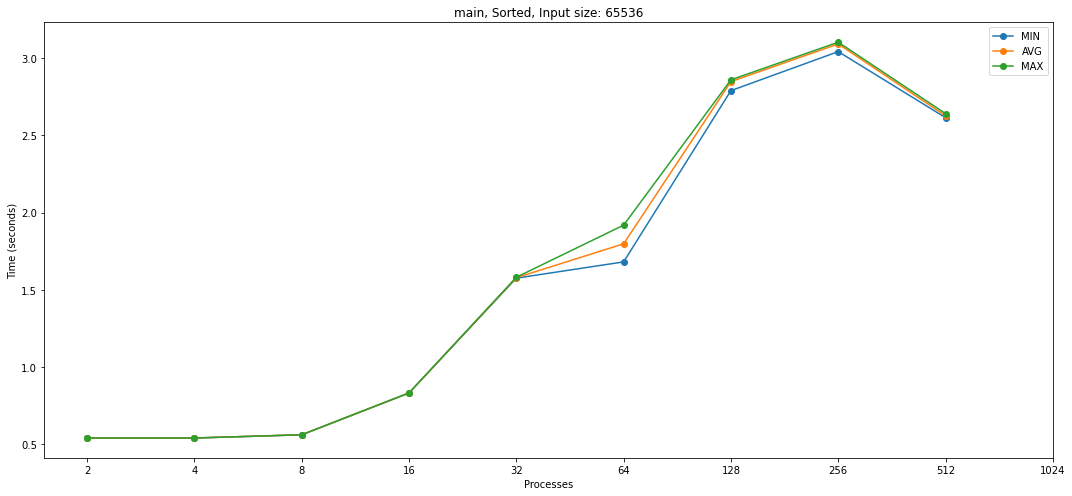

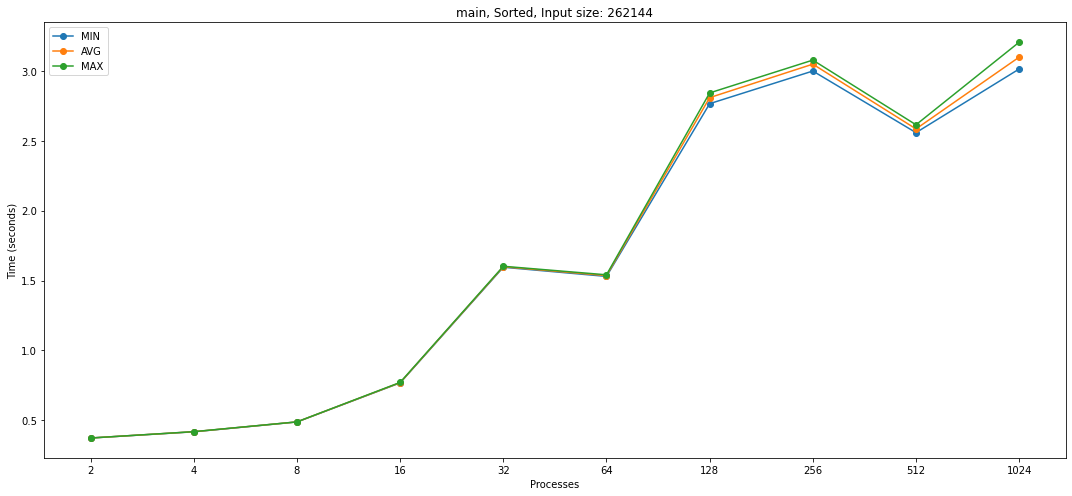

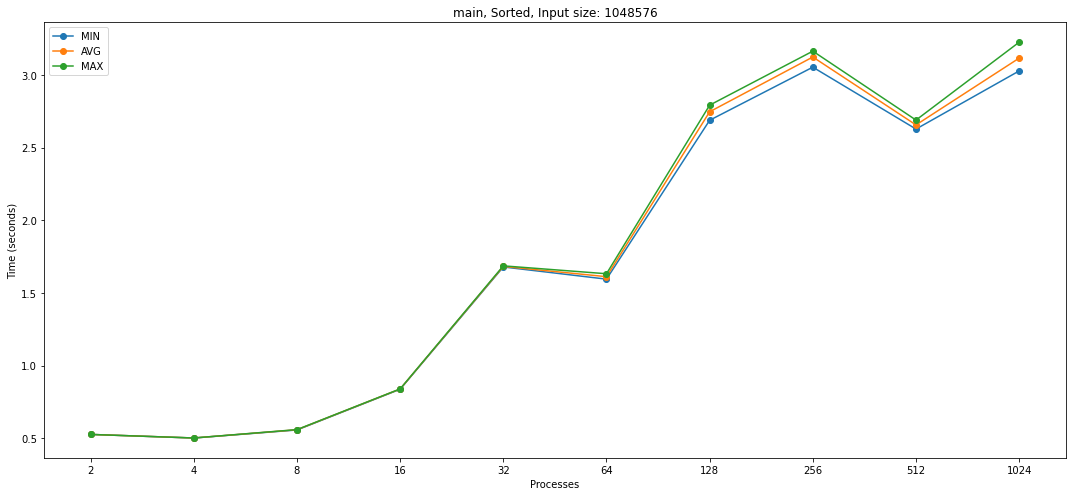

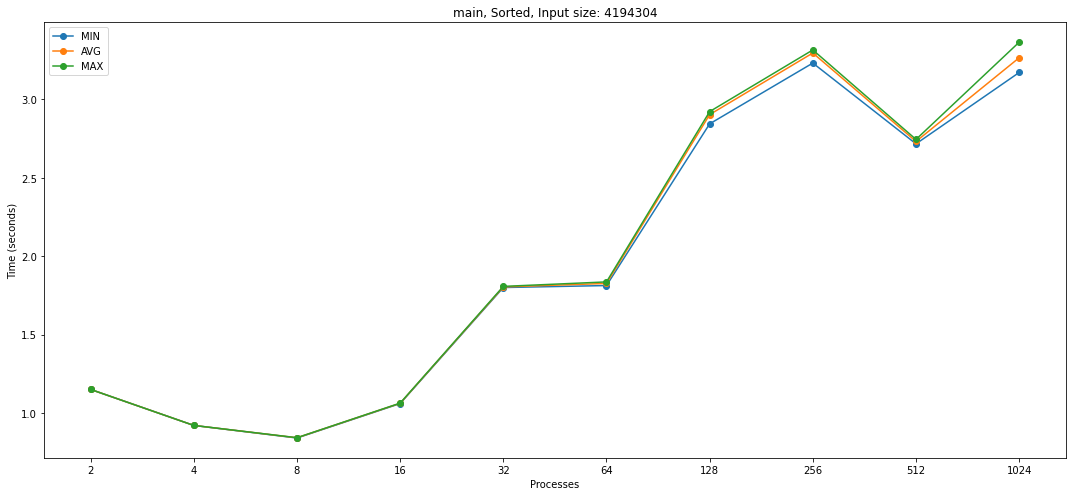

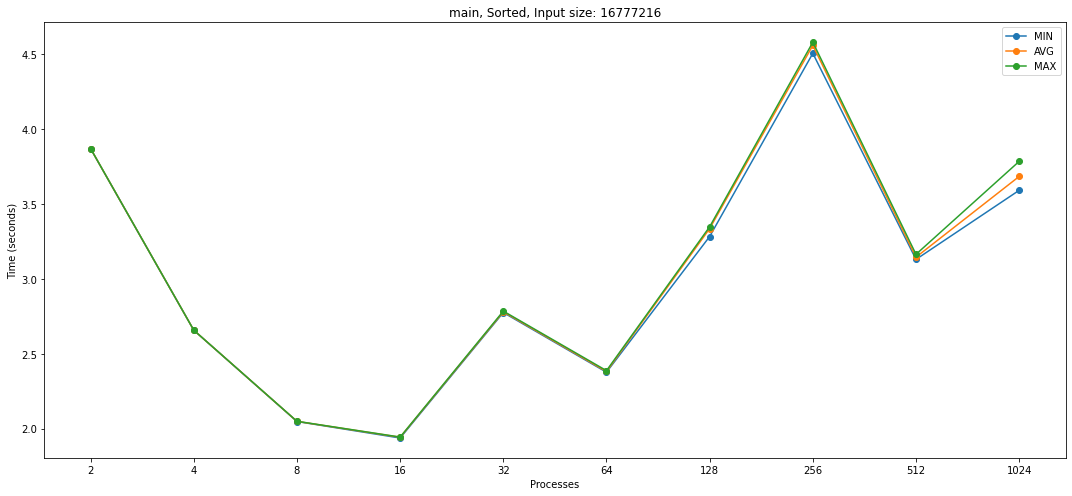

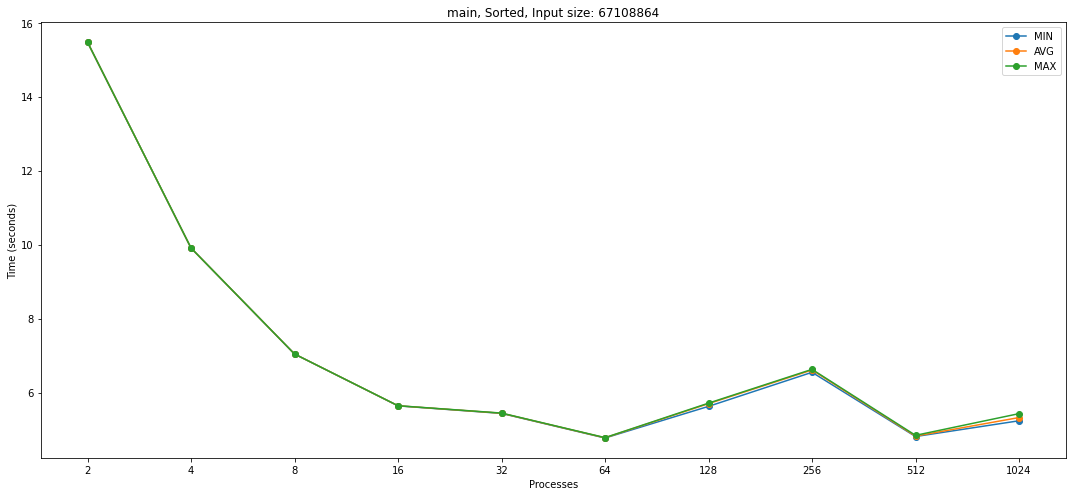

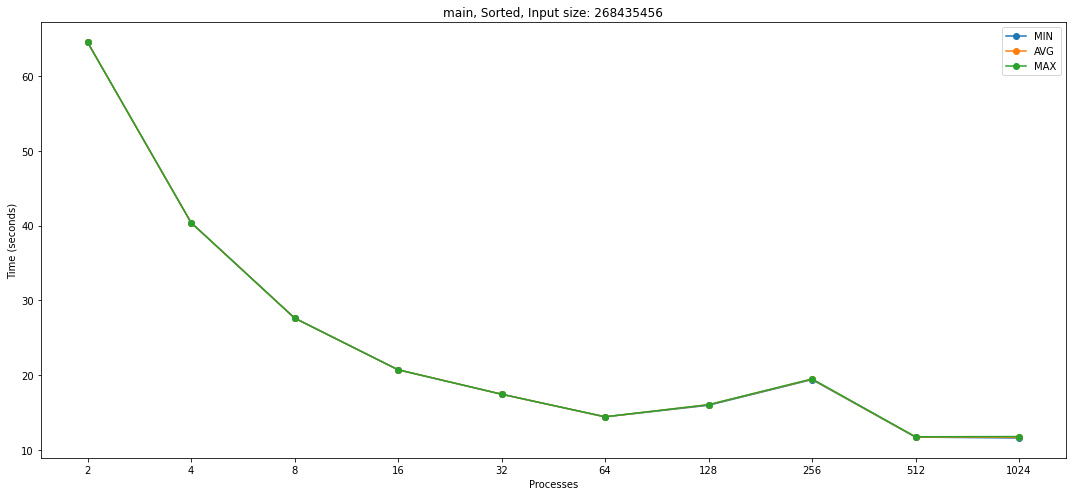

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.001810   0.000121   0.000137   0.000144   0.000177   0.000140   
4            0.001728   0.000143   0.000152   0.000159   0.000167   0.000166   
8            0.000844   0.000139   0.000137   0.000148   0.000158   0.000160   
16           0.003054   0.000201   0.000149   0.000169   0.000622   0.000214   
32           0.001138   0.000167   0.000571   0.000609   0.000391   0.000281   

input_size  268435456  
num_procs              
2            0.000166  
4            0.000556  
8            0.000165  
16           0.000224  
32           0.001070  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000005   0.000004   0.000006   0.000007   0.000009   0.000010   
4            0.000005   0.00000

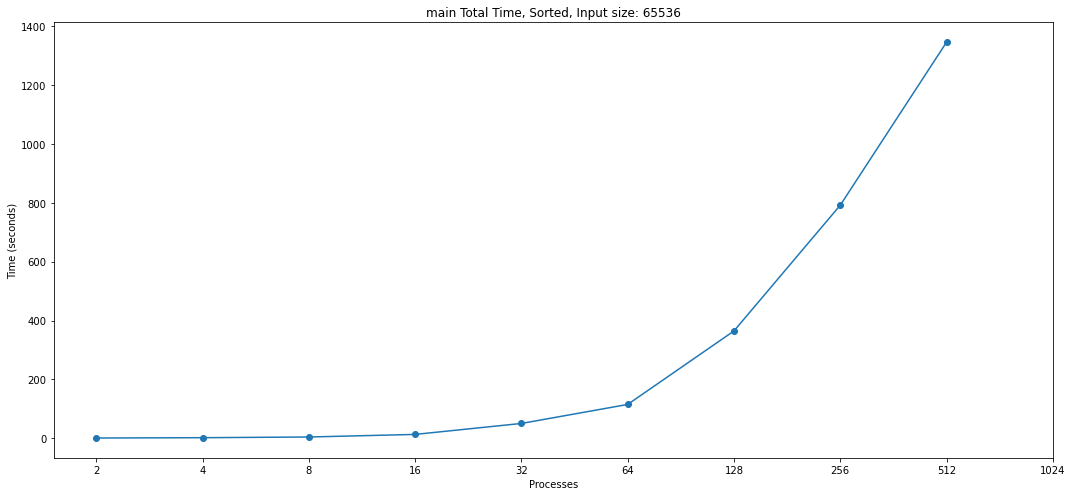

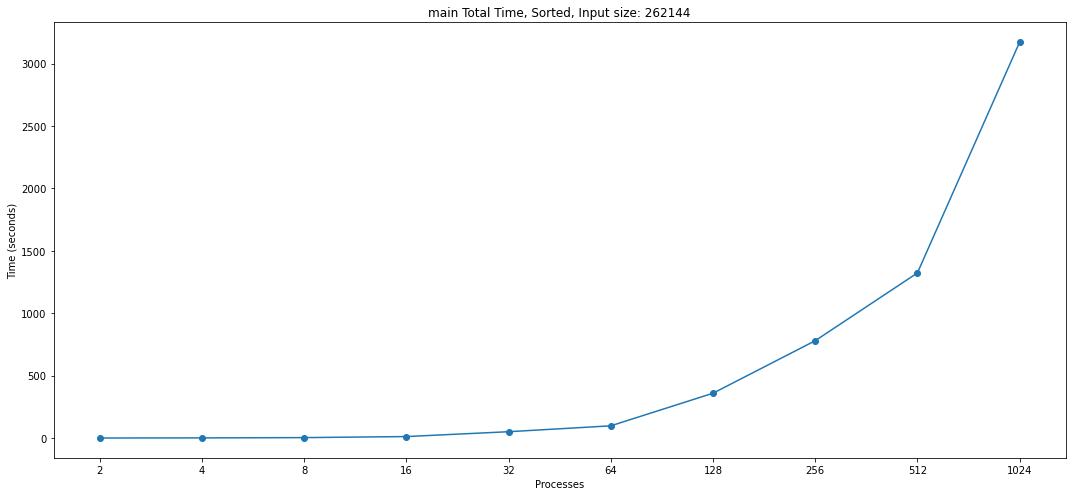

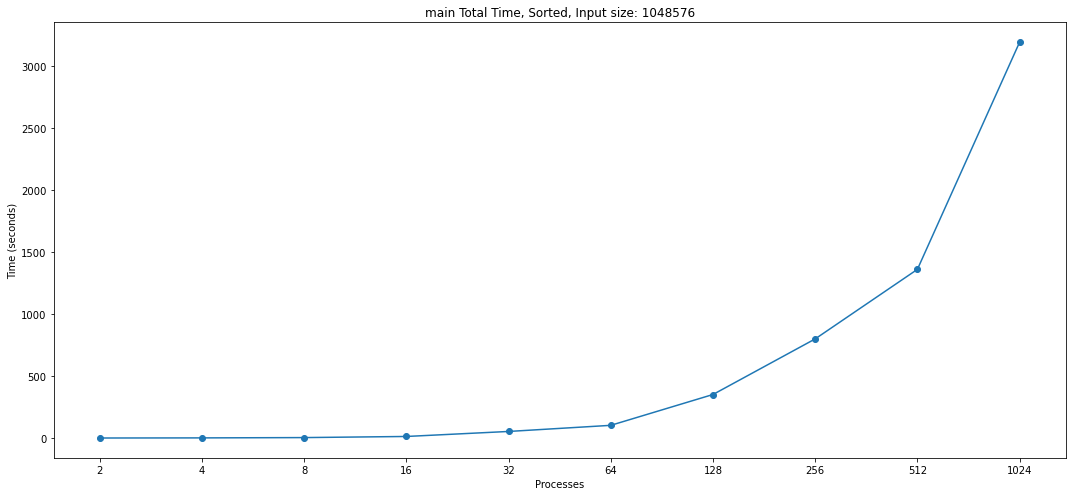

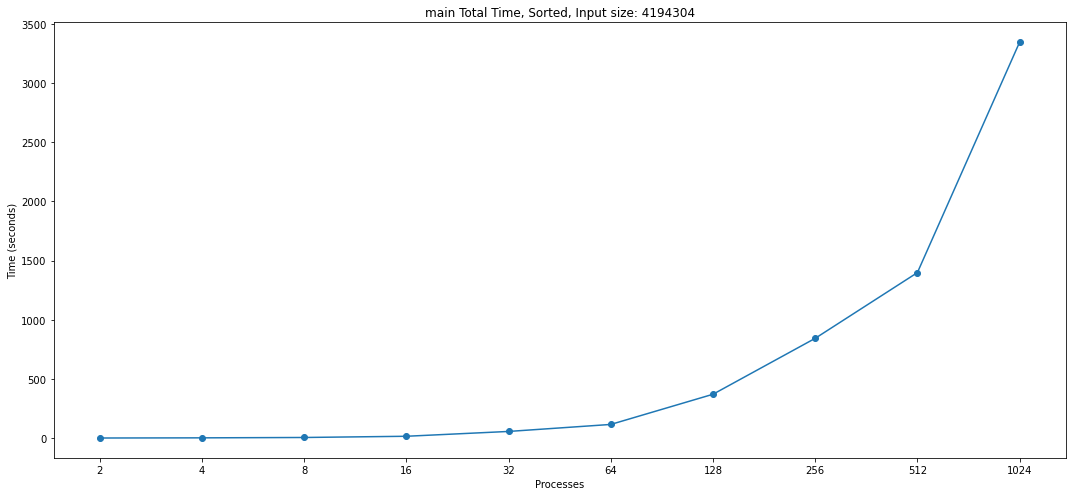

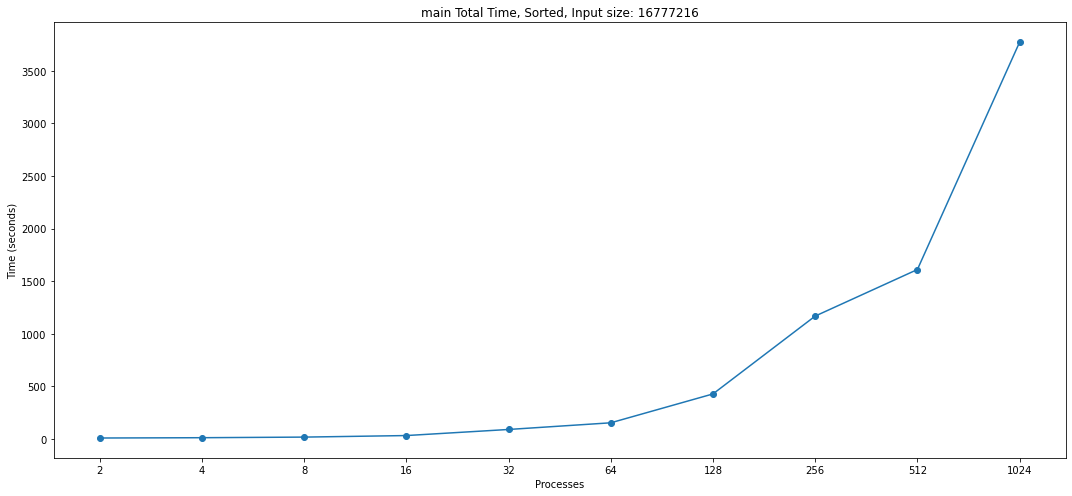

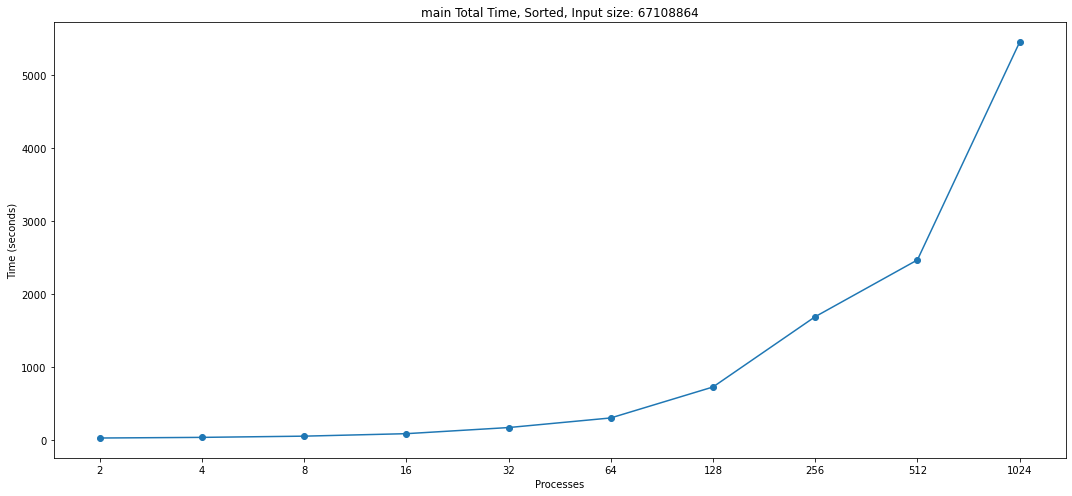

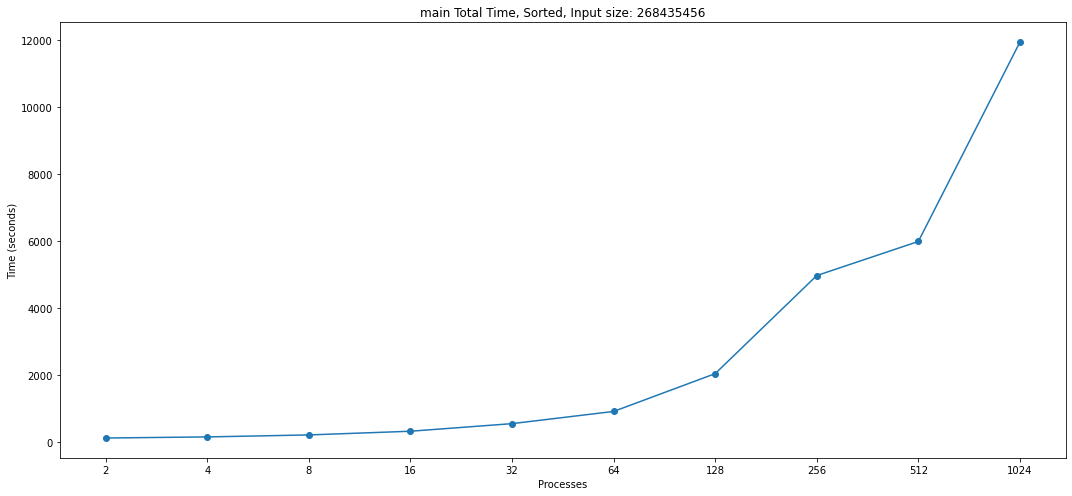

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.004953   0.006523   0.023676   0.090821   0.362377   1.441881   
4            0.011168   0.019260   0.072702   0.281624   1.119938   4.470170   
8            0.022452   0.044744   0.165877   0.665076   2.651521  10.627606   
16           0.062995   0.098746   0.362121   1.423874   5.723194  22.983291   
32           0.083824   0.201006   0.777875   2.983793  13.949614  47.904868   

input_size   268435456  
num_procs               
2             5.773709  
4            17.884976  
8            42.476256  
16           91.735562  
32          191.790029  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000013   0.000017   0.000021   0.000029   0.000030   0.000033   
4            0.000024   

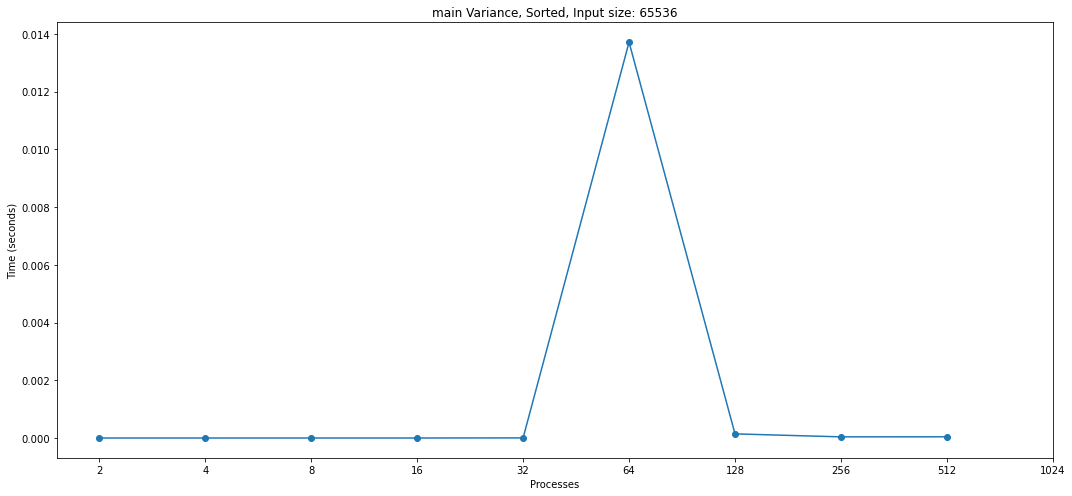

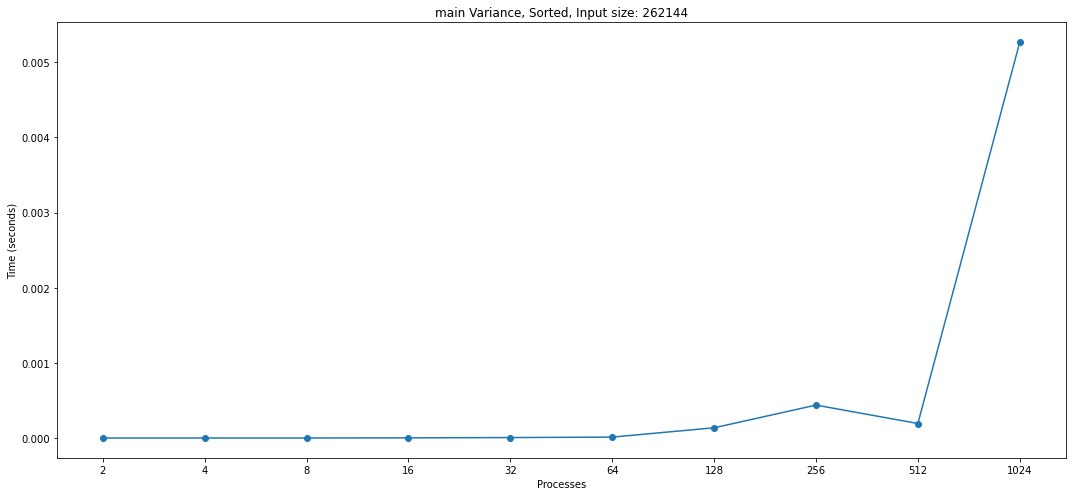

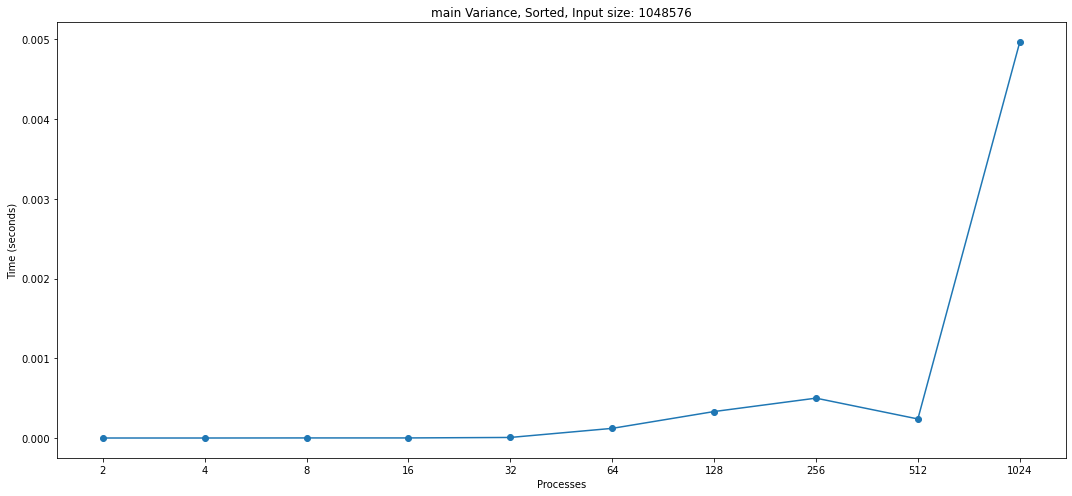

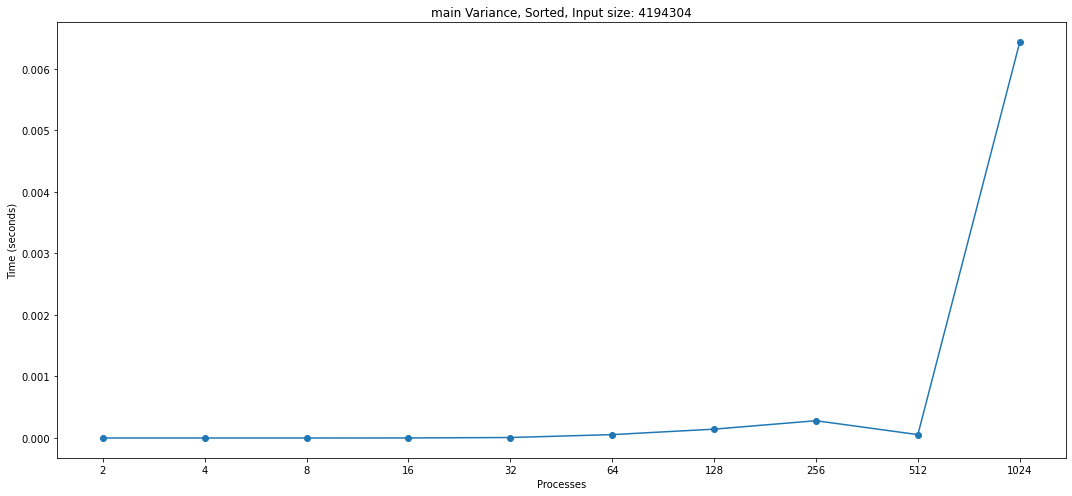

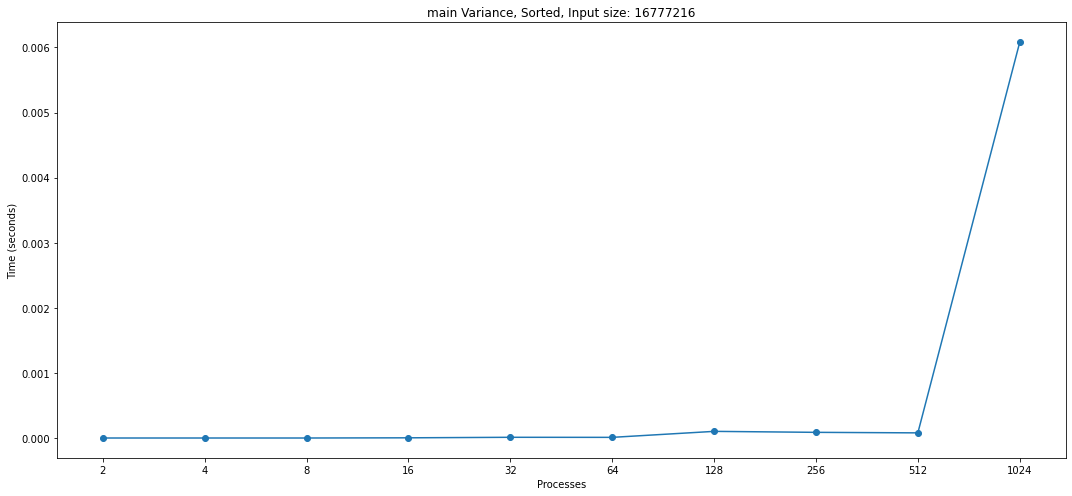

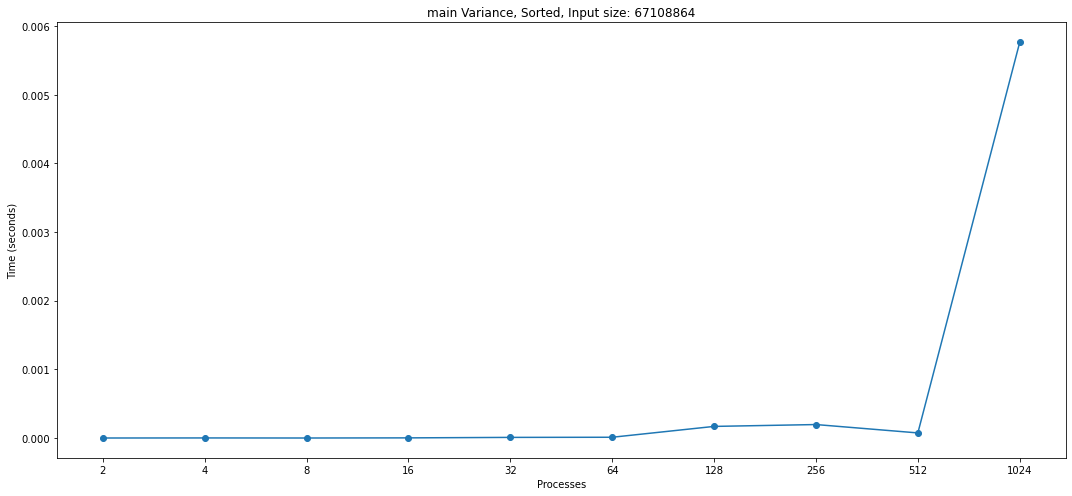

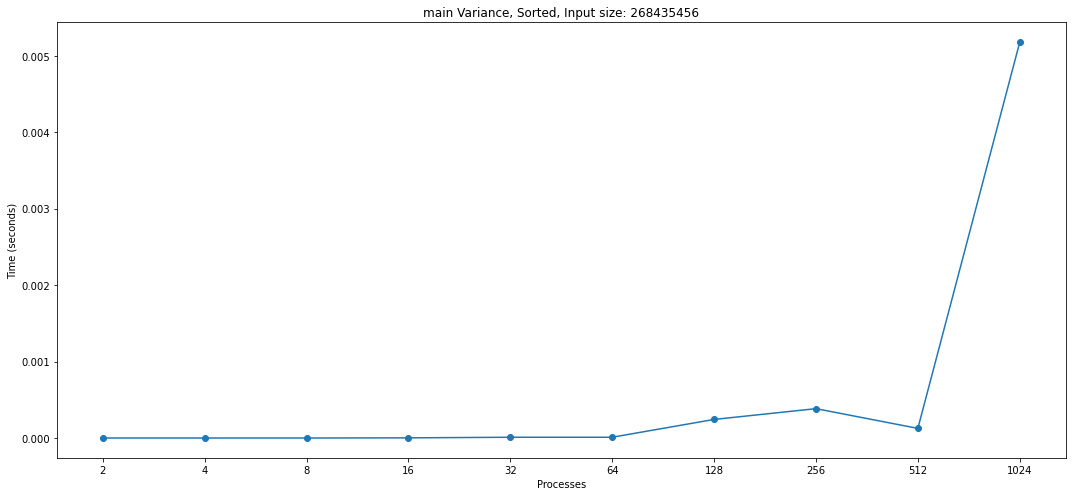

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000000   0.000010   0.000137   0.002049   0.032765   0.519554   
4            0.000000   0.000007   0.000108   0.001645   0.026105   0.416188   
8            0.000001   0.000004   0.000061   0.000984   0.015681   0.252067   
16           0.000000   0.000002   0.000034   0.000526   0.008501   0.137539   
32           0.000000   0.000001   0.000018   0.000277   0.006120   0.072293   

input_size  268435456  
num_procs              
2            8.332969  
4            6.662353  
8            4.027072  
16           2.191347  
32           1.158632  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2                 0.0        0.0        0.0        0.0        0.0        0.0   
4                 0.0        0.

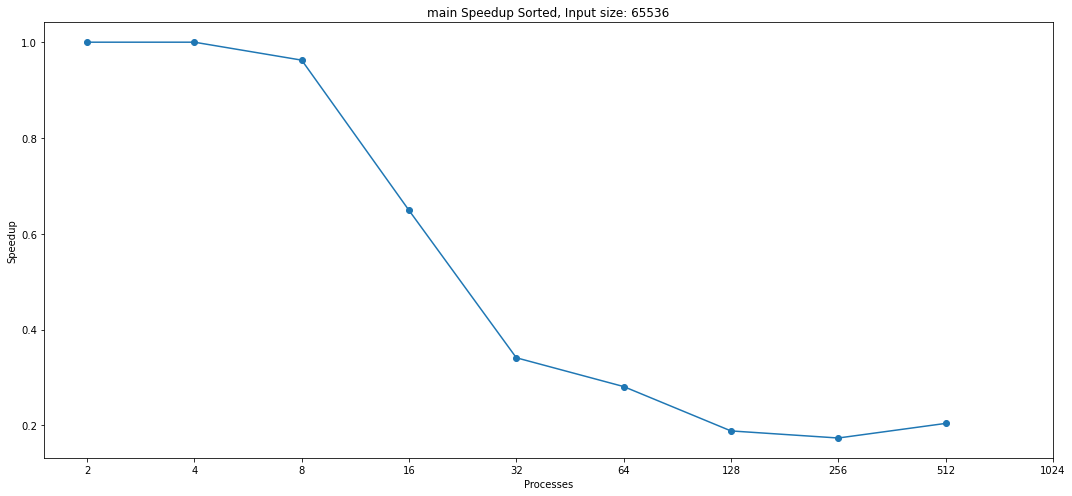

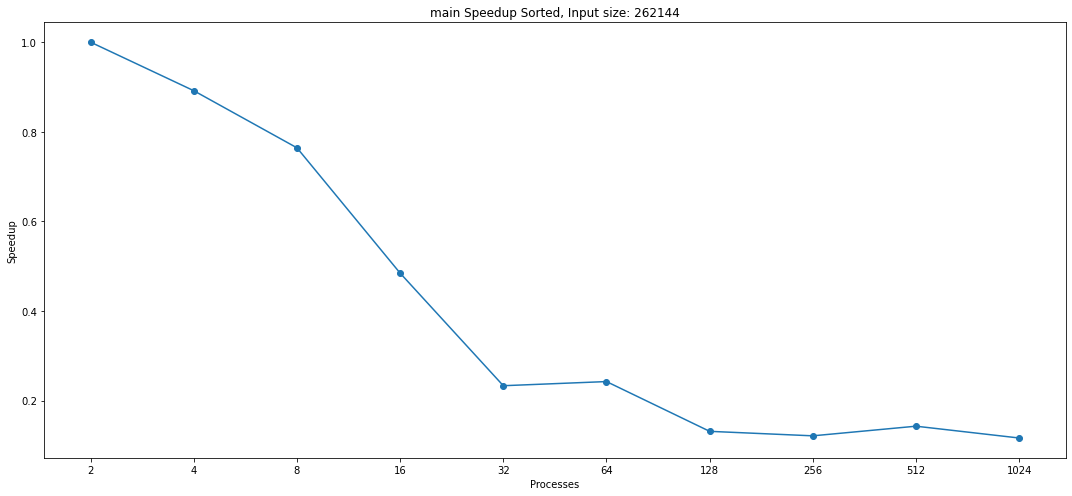

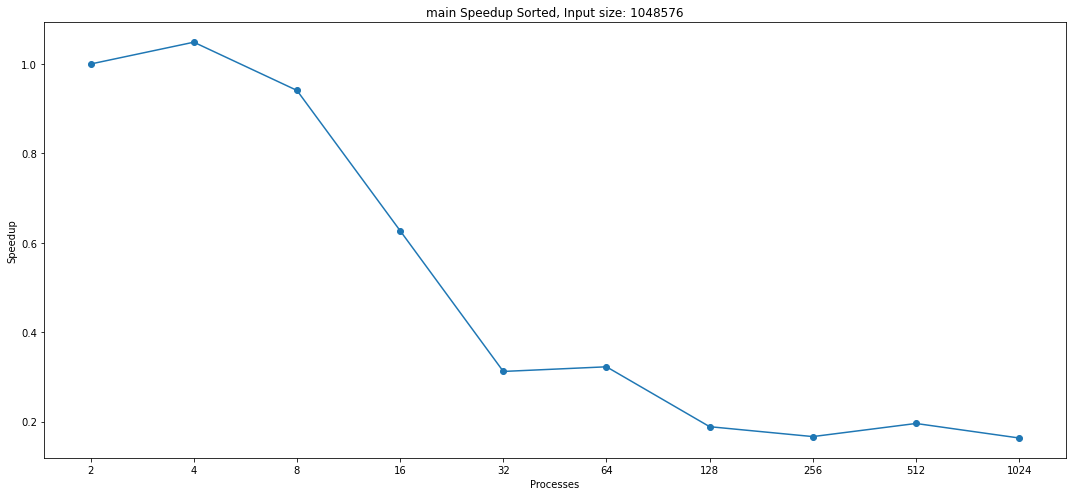

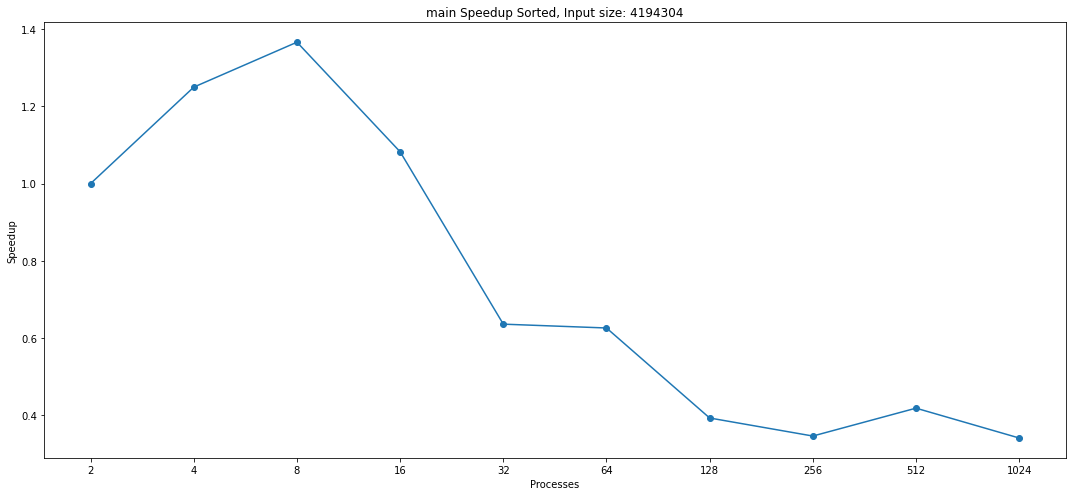

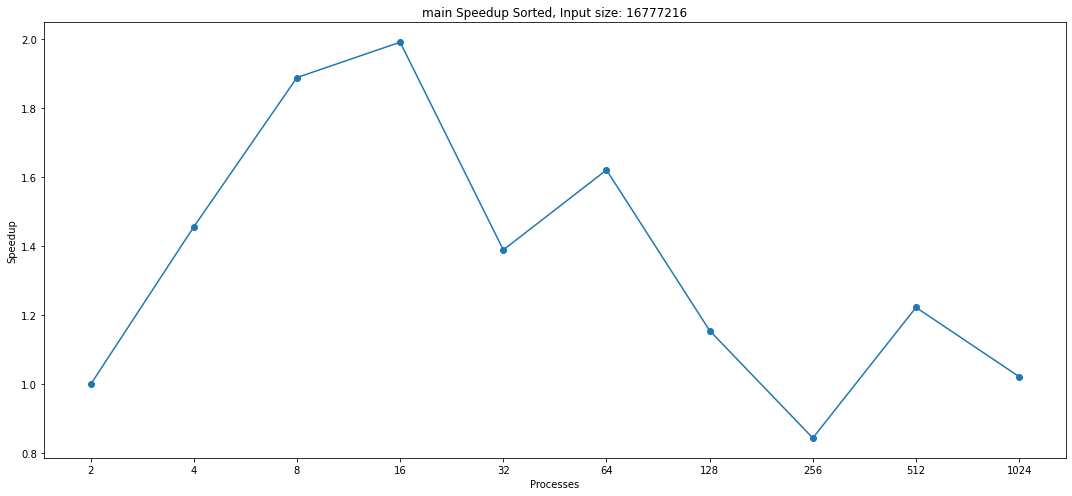

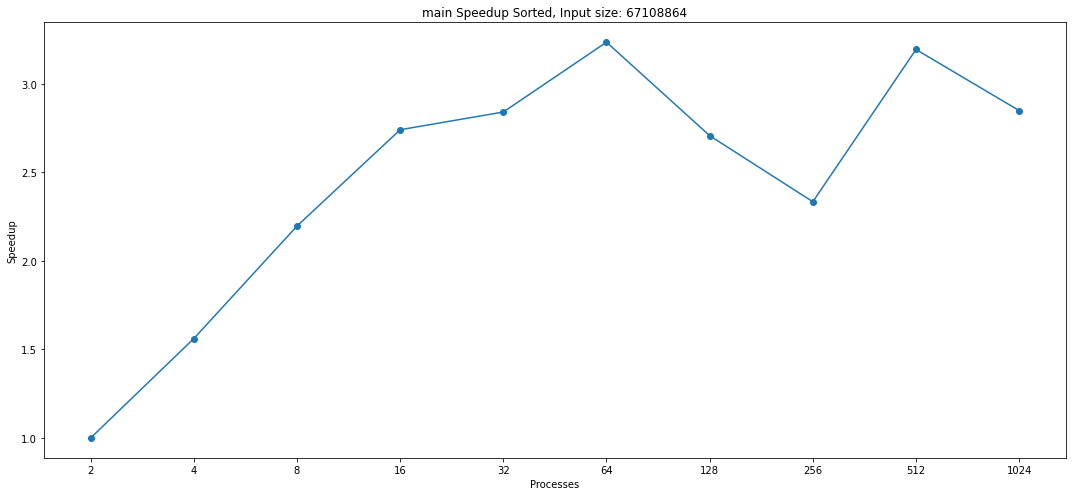

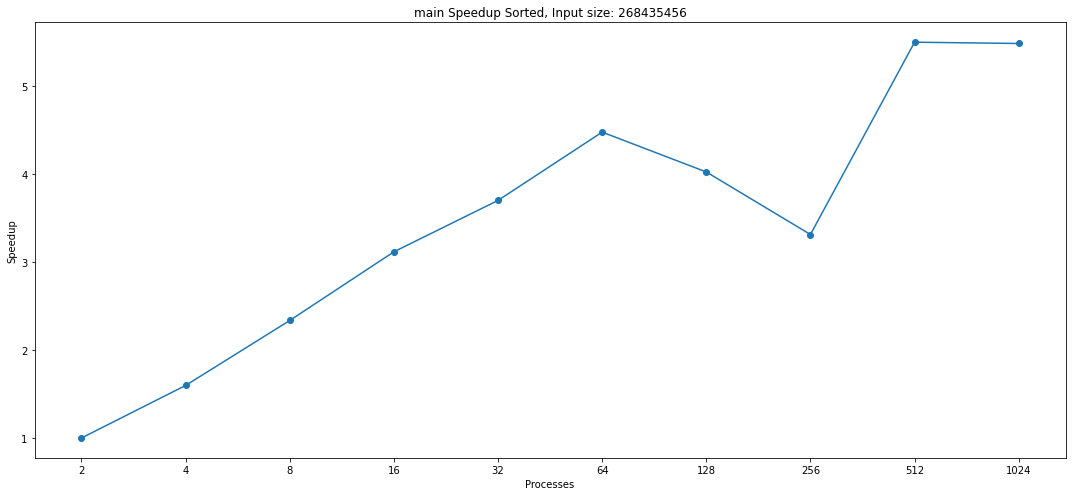

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.003143   0.006402   0.023539   0.090678   0.362200   1.441741   
4            0.003151   0.006383   0.024202   0.094898   0.376425   1.494777   
8            0.003096   0.006392   0.023699   0.095689   0.381953   1.523563   
16           0.004009   0.006618   0.024163   0.095420   0.384990   1.545513   
32           0.002760   0.006651   0.025177   0.096521   0.452039   1.566884   

input_size  268435456  
num_procs              
2            5.773543  
4            5.963648  
8            6.076356  
16           6.119585  
32           6.226474  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000008   0.000013   0.000015   0.000022   0.000021   0.000023   
4            0.000009   0.00001

In [53]:
leg = ["MIN", "AVG", "MAX"]

processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def plot_mplSorted(df, df2, df3, title, xlabel, ylabel):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.plot(processes, df2[input_size], marker='o')
        ax.plot(processes, df3[input_size], marker='o')

        ax.set_title(title + ", Sorted, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Sorted_{title}_{input_size}.png")
        plt.show()

for node in tkSorted.graph.traverse():
    plot_mplSorted(
        df=tkSorted.dataframe.loc[node, "Min time/rank"].unstack(level="input_size"),
        df2=tkSorted.dataframe.loc[node, "Avg time/rank"].unstack(level="input_size"),
        df3=tkSorted.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
    )
    
def plot_mplSortedOne(df, title, xlabel, ylabel, typ):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.set_title(title + " " + typ + ", Sorted, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Sorted_{title}_{typ}_{input_size}.png")
        plt.show()
    
    
for node in tkSorted.graph.traverse():
    plot_mplSortedOne(
        df=tkSorted.dataframe.loc[node, "Total time"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Total Time"
    )
    
for node in tkSorted.graph.traverse():
    plot_mplSortedOne(
        df=tkSorted.dataframe.loc[node, "Variance time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Variance"
    )

def plot_mplSortedSpeedup(df, title, xlabel, ylabel, typ):
    print(df.head())
    
    baseline = df.loc[2];
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, baseline[input_size] / df[input_size], marker='o')
        ax.set_title(title + " " + typ + " Sorted, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Sorted_{title}_{typ}_{input_size}.png")
        plt.show()
    
for node in tkSorted.graph.traverse():
    plot_mplSortedSpeedup(
        df=tkSorted.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Speedup",
        typ="Speedup"
    )

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.324273   0.362144   0.490539   1.011357   3.245003  12.616439   
4            0.386118   0.386278   0.477799   0.835059   2.341495   8.574223   
8            0.480595   0.494905   0.552925   0.817572   1.904883   6.401005   
16           0.776774   0.784117   0.813207   1.028342   1.870494   5.318890   
32           1.567816   1.622003   1.680056   1.770404   2.518751   5.296898   

input_size  268435456  
num_procs              
2           51.882188  
4           34.328163  
8           24.739848  
16          19.416219  
32          16.697740  


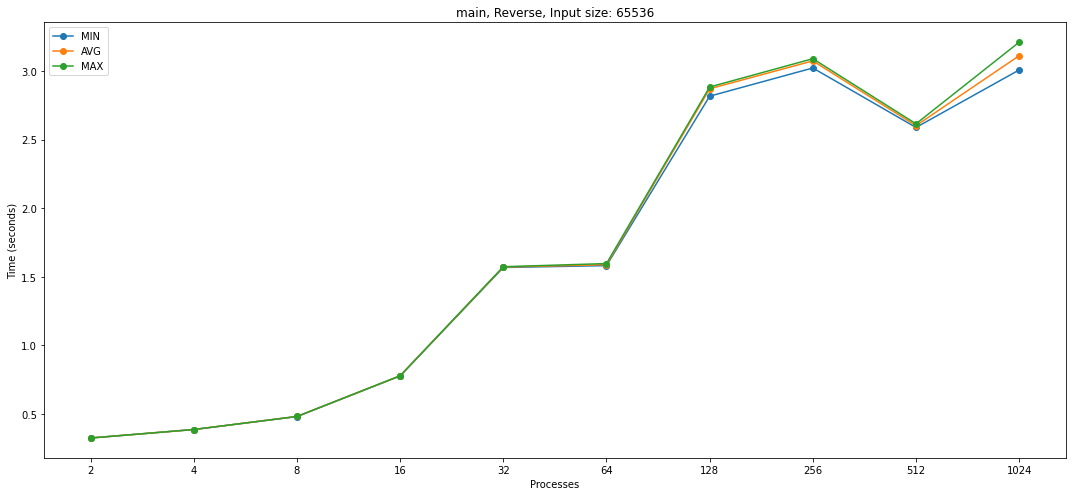

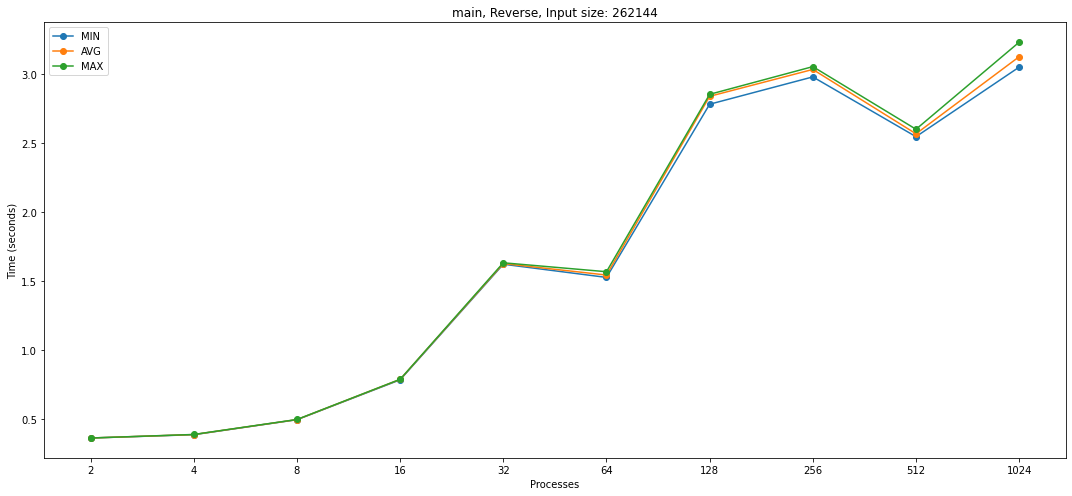

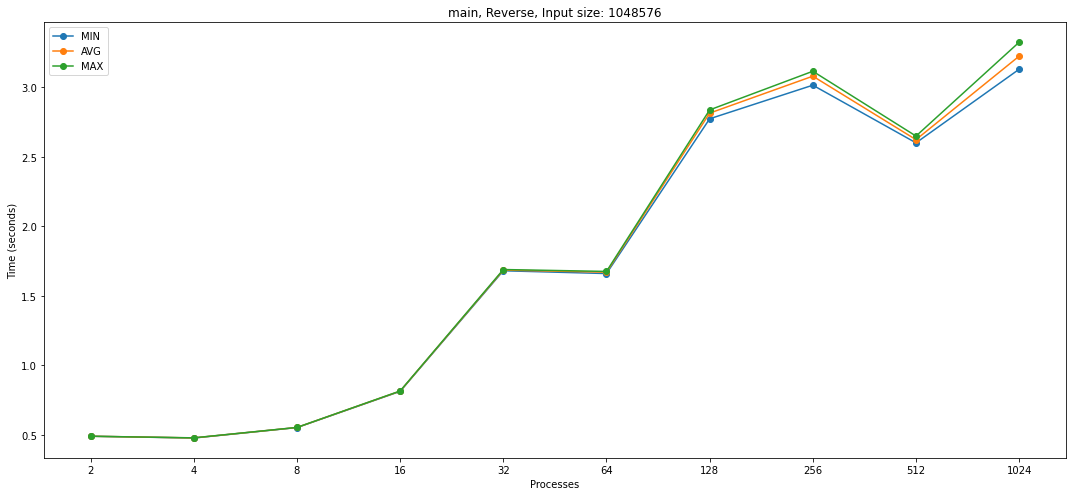

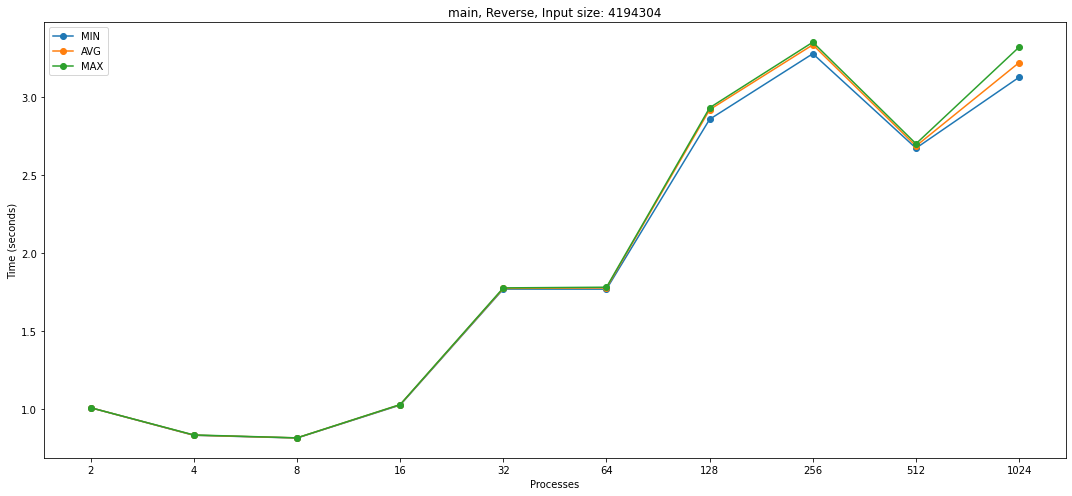

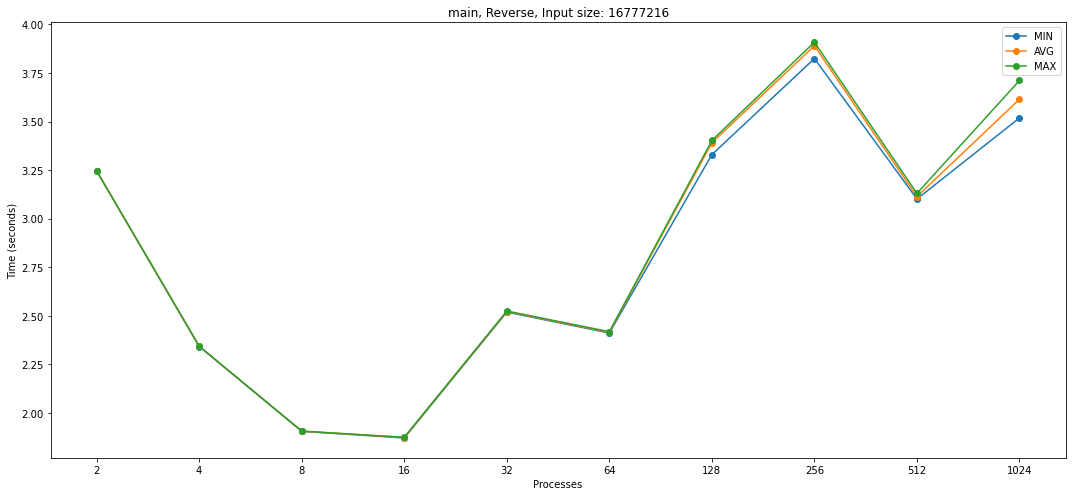

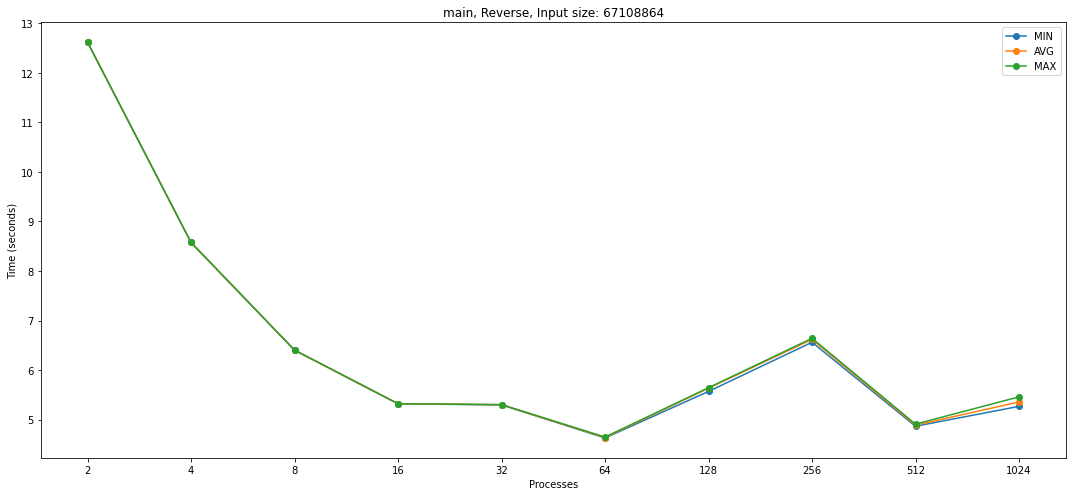

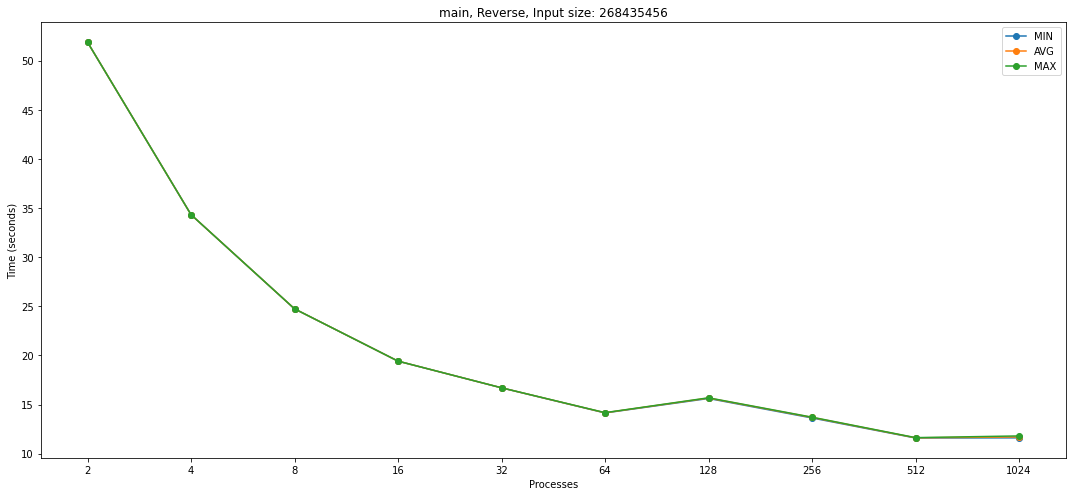

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000119   0.000120   0.000141   0.000152   0.000176   0.000174   
4            0.000522   0.000126   0.000138   0.000154   0.000198   0.000165   
8            0.000122   0.000133   0.000134   0.000147   0.000192   0.000205   
16           0.000187   0.000570   0.000158   0.000585   0.000233   0.000238   
32           0.000197   0.000602   0.000690   0.000162   0.000332   0.000634   

input_size  268435456  
num_procs              
2            0.000157  
4            0.001397  
8            0.000193  
16           0.000658  
32           0.000601  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000004   0.000005   0.000005   0.000007   0.000008   0.000013   
4            0.000004   0.00000

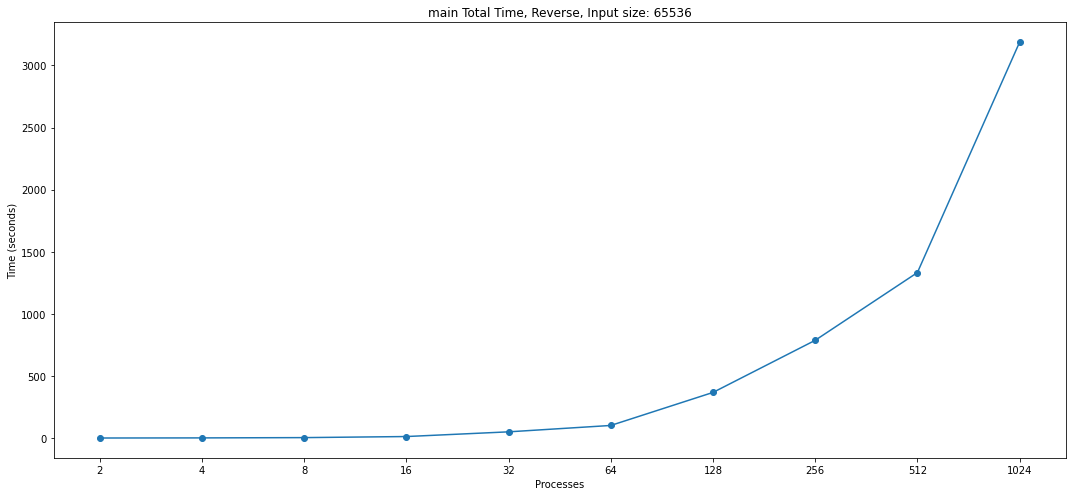

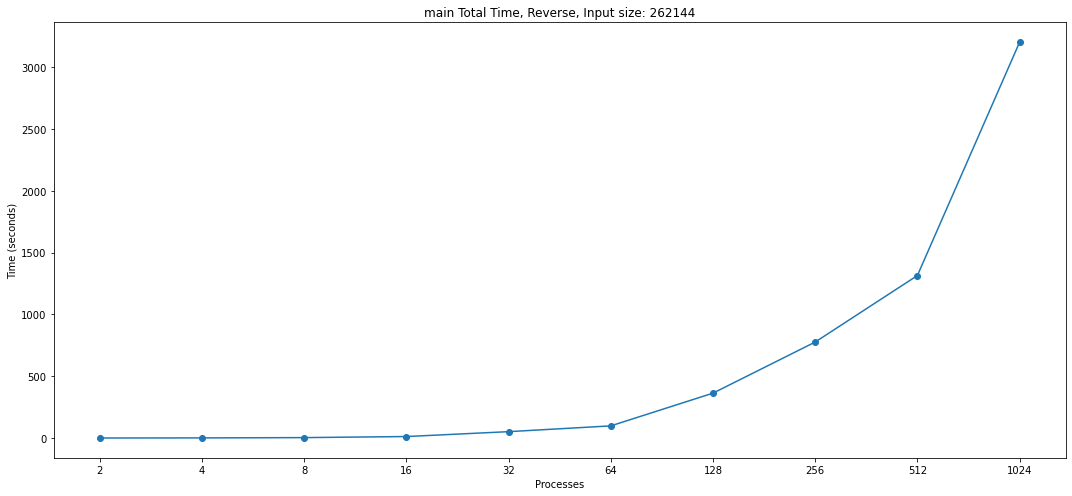

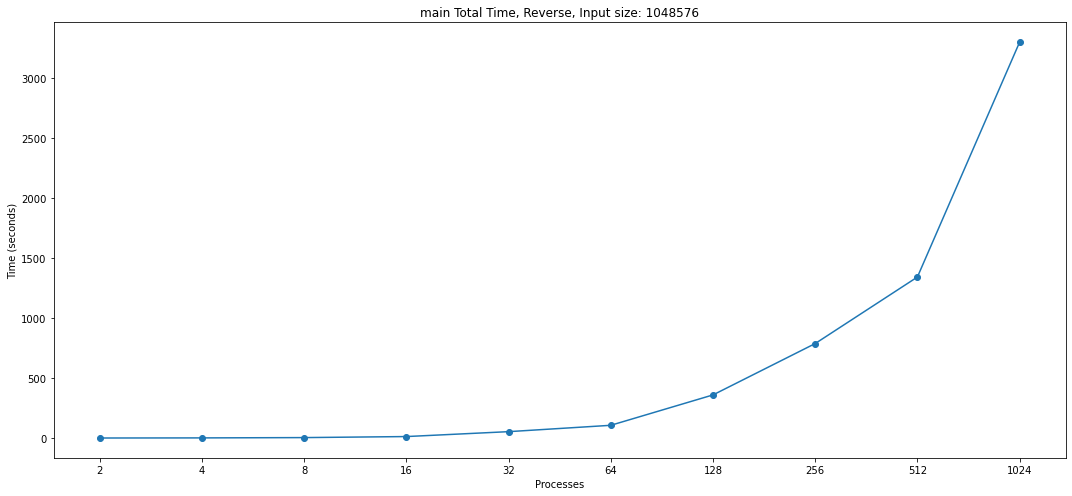

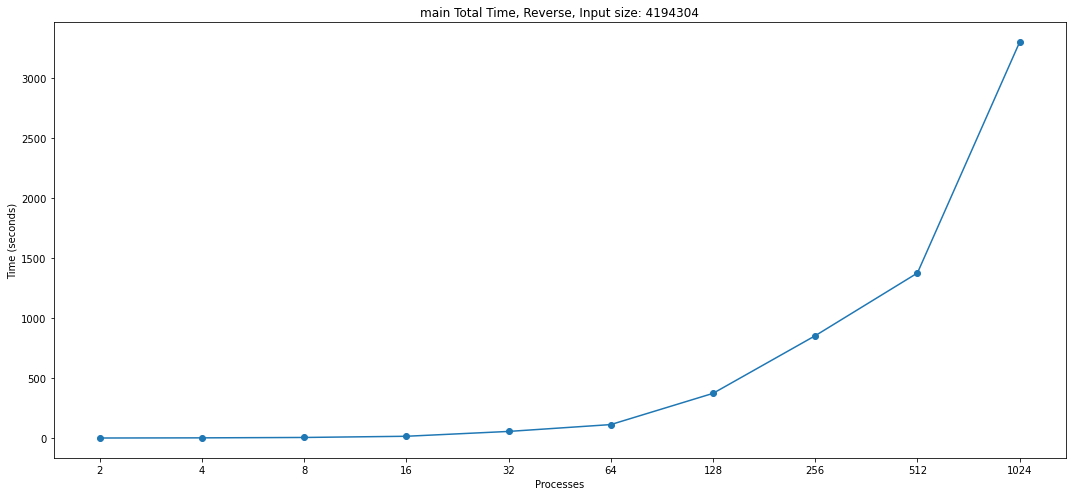

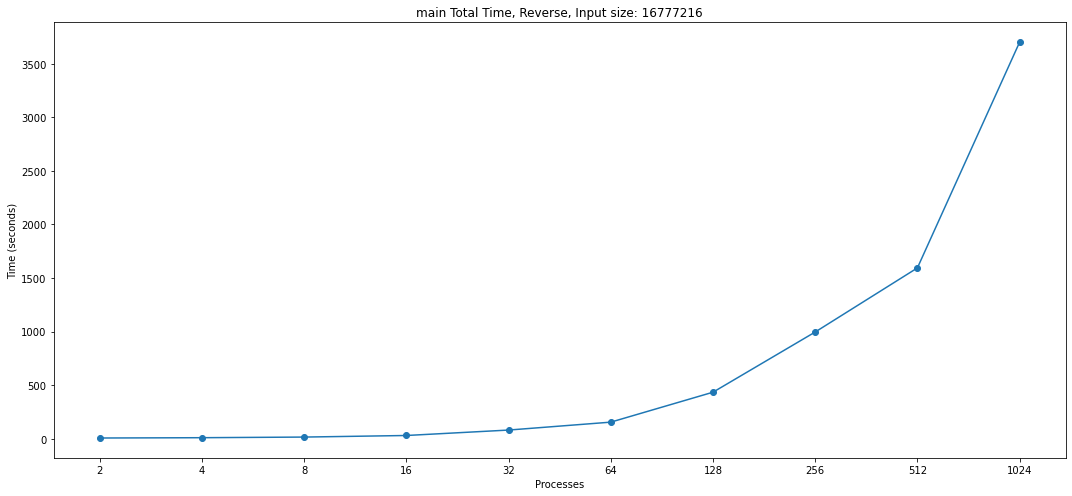

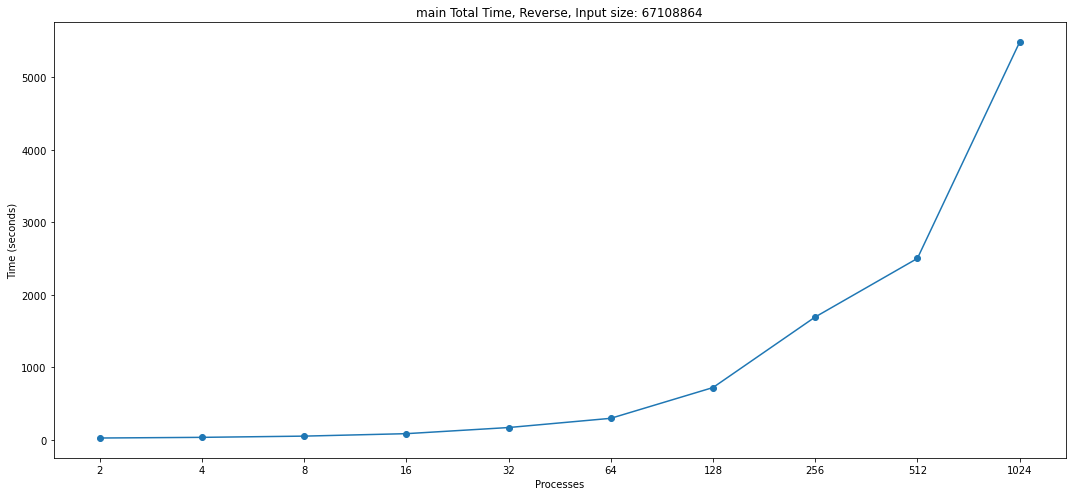

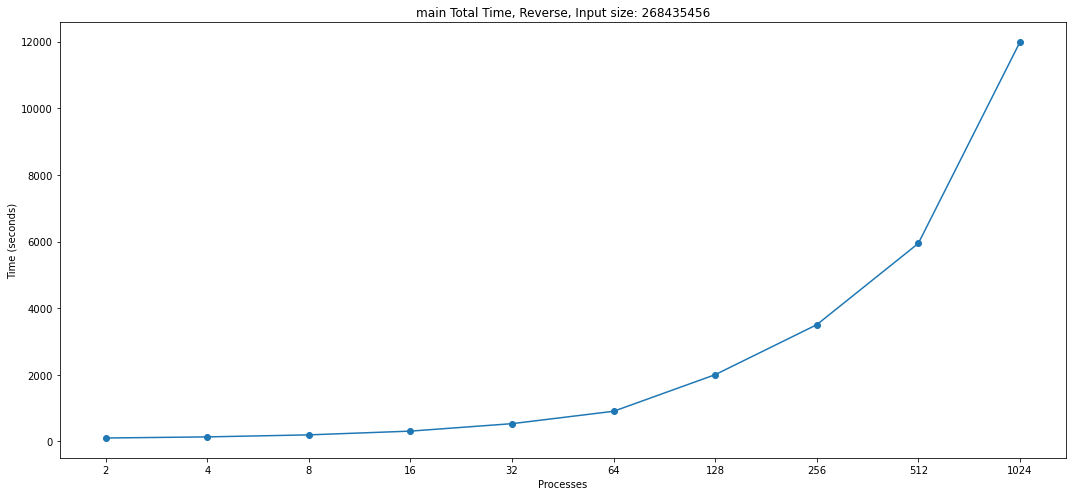

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.002085   0.006540   0.023727   0.091208   0.362266   1.440603   
4            0.007424   0.019639   0.072334   0.281137   1.121114   4.469132   
8            0.012900   0.045225   0.165886   0.666004   2.653526  10.624710   
16           0.032785   0.104825   0.363381   1.430799   5.754436  22.920757   
32           0.064013   0.219007   0.775552   2.973639  11.953574  47.410213   

input_size   268435456  
num_procs               
2             5.767759  
4            17.821690  
8            42.356419  
16           91.866897  
32          191.435305  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000017   0.000016   0.000021   0.000027   0.000035   0.000038   
4            0.000026   

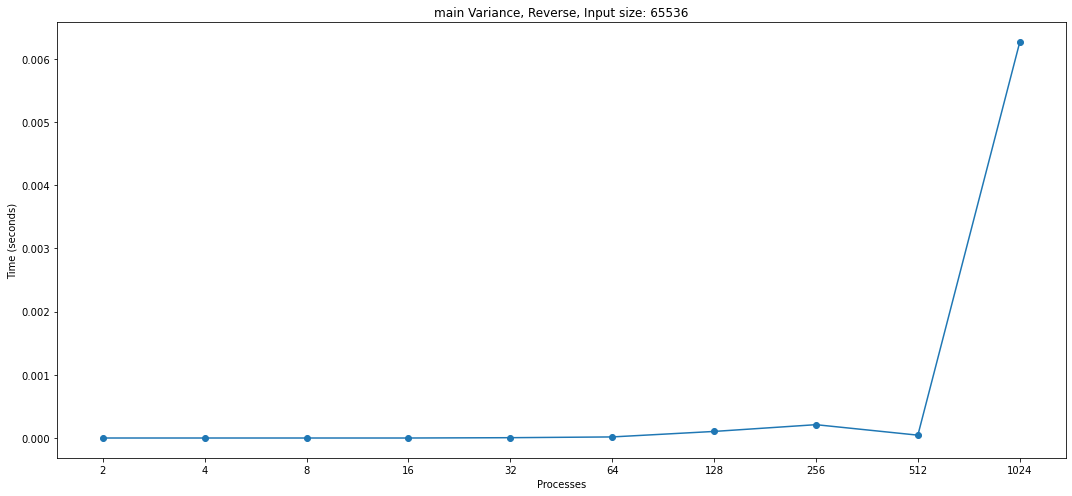

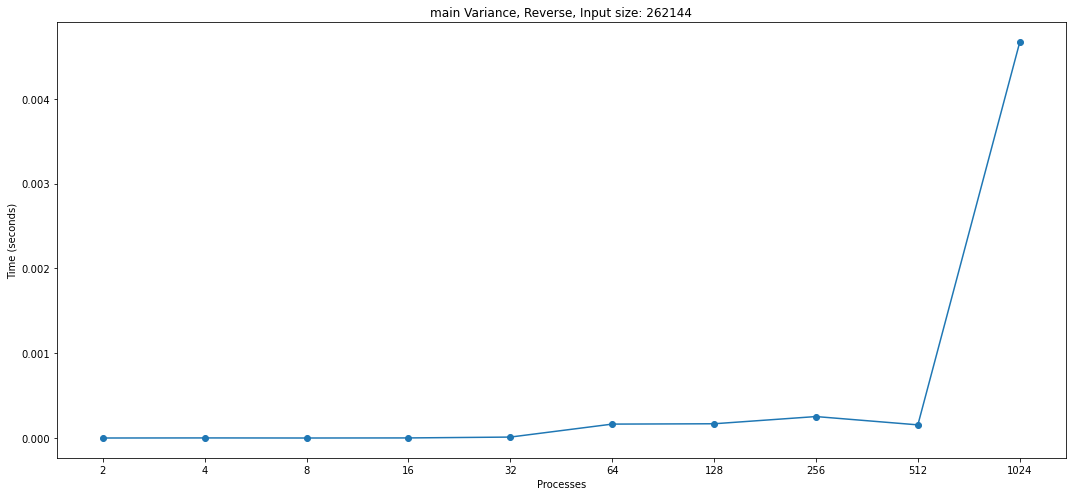

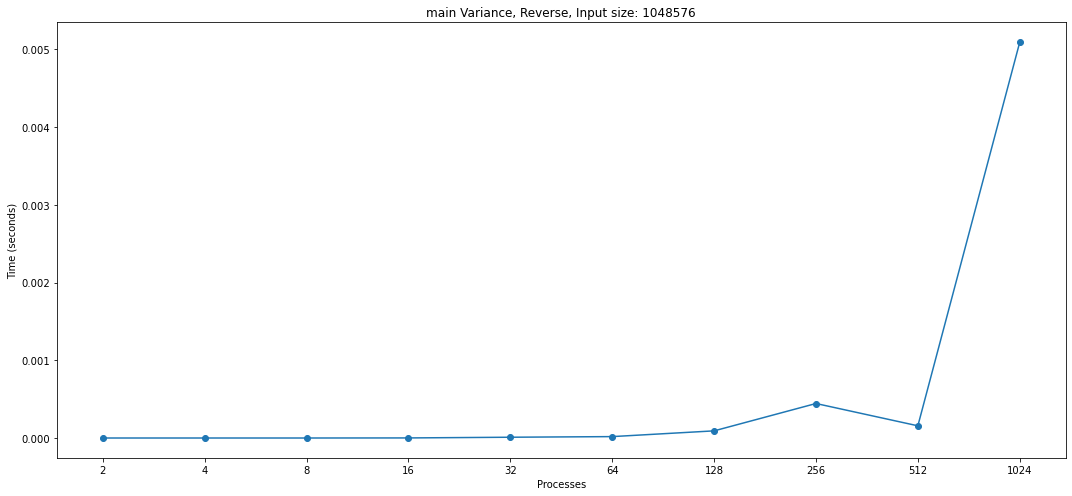

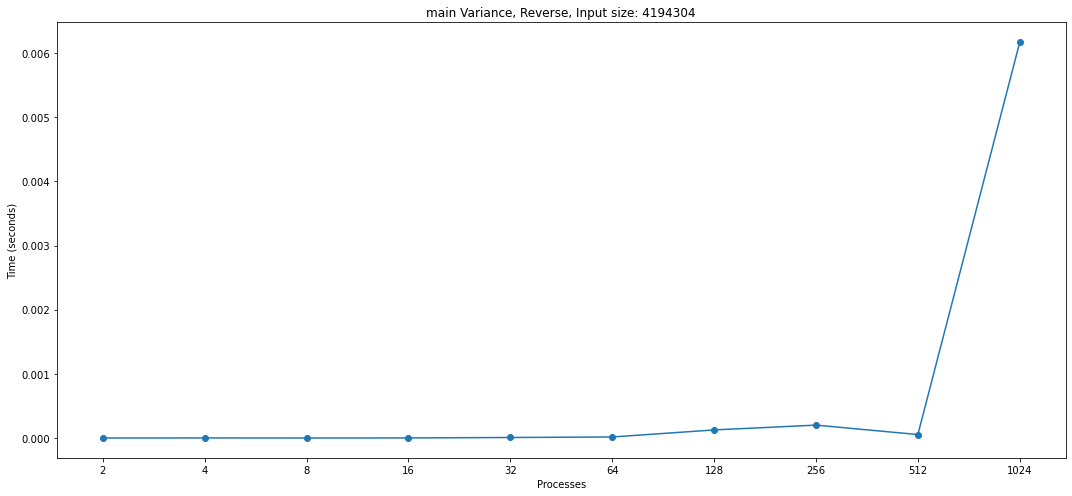

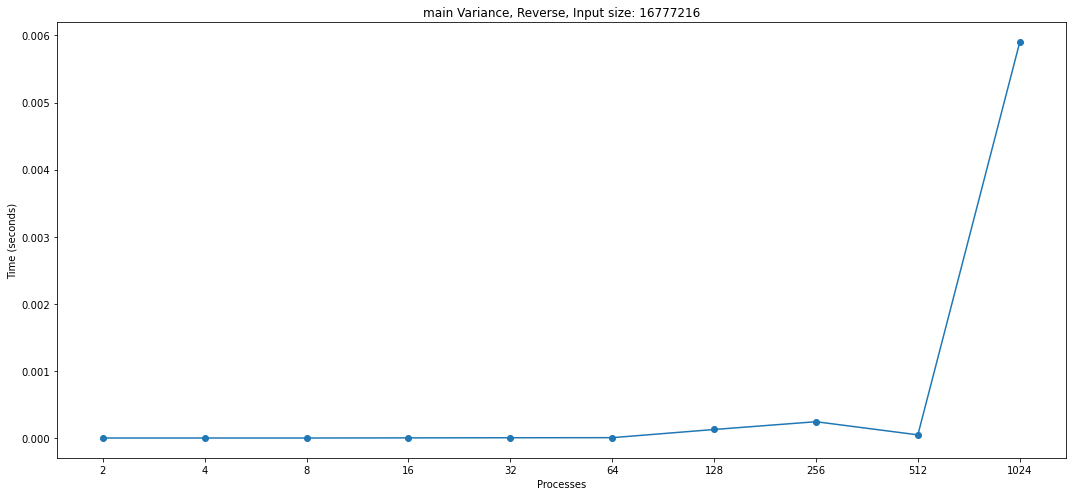

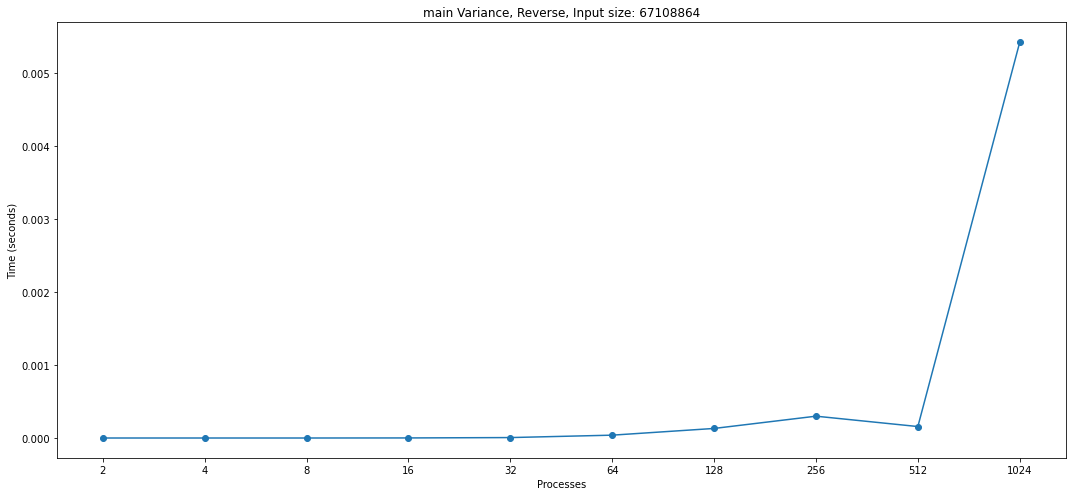

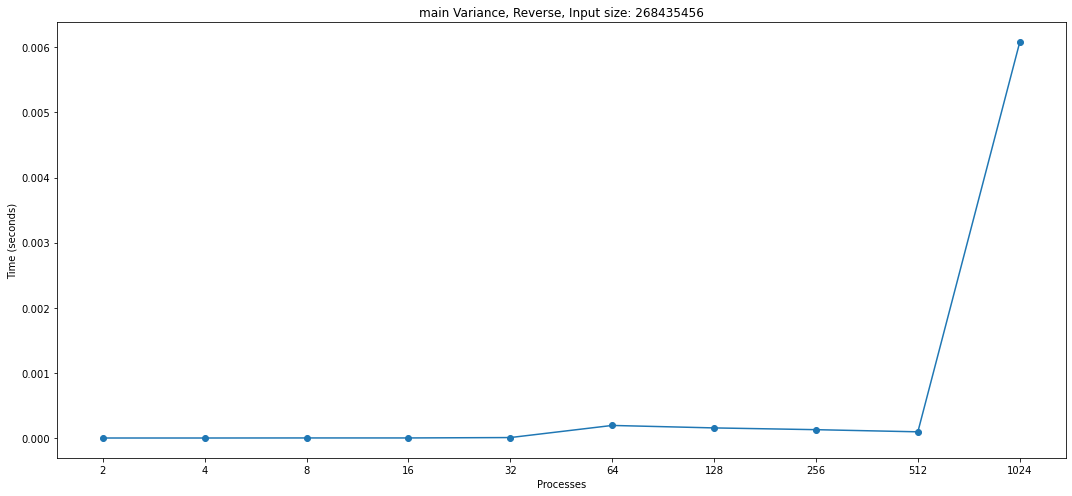

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000001   0.000010   0.000137   0.002066   0.032746   0.518583   
4            0.000001   0.000008   0.000107   0.001640   0.026154   0.415993   
8            0.000000   0.000004   0.000061   0.000987   0.015701   0.251911   
16           0.000000   0.000002   0.000034   0.000526   0.008613   0.136783   
32           0.000000   0.000001   0.000018   0.000278   0.004496   0.070778   

input_size  268435456  
num_procs              
2            8.315858  
4            6.612822  
8            4.004336  
16           2.197334  
32           1.154415  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2                 0.0        0.0        0.0        0.0        0.0        0.0   
4                 0.0        0.

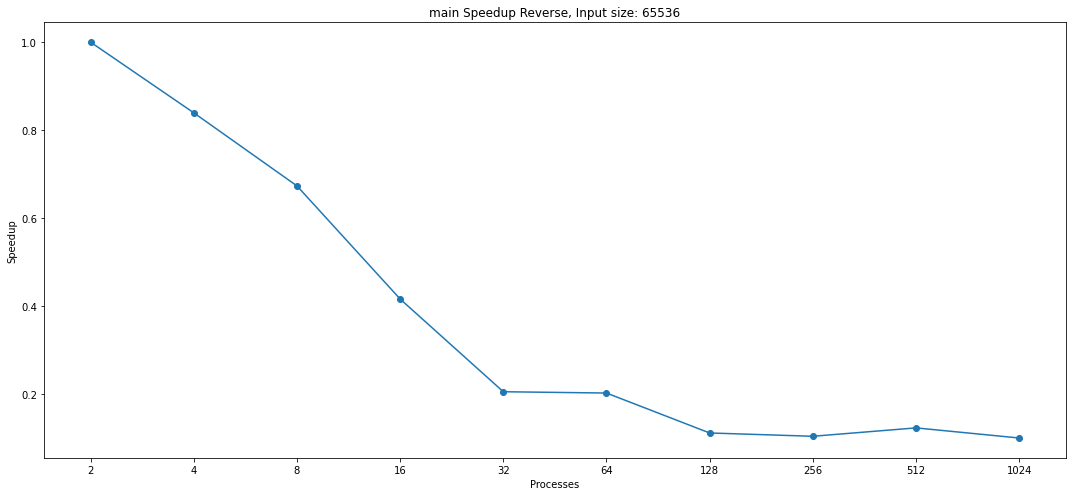

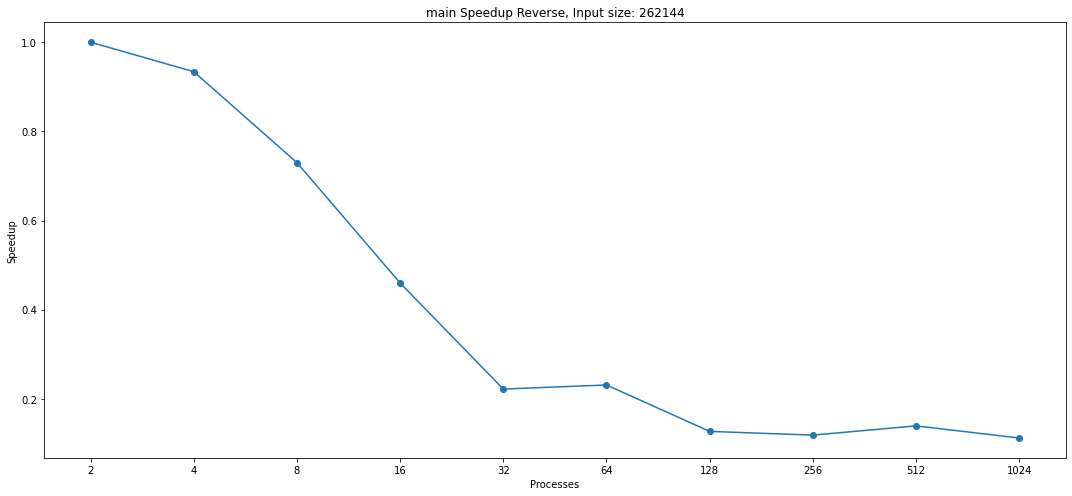

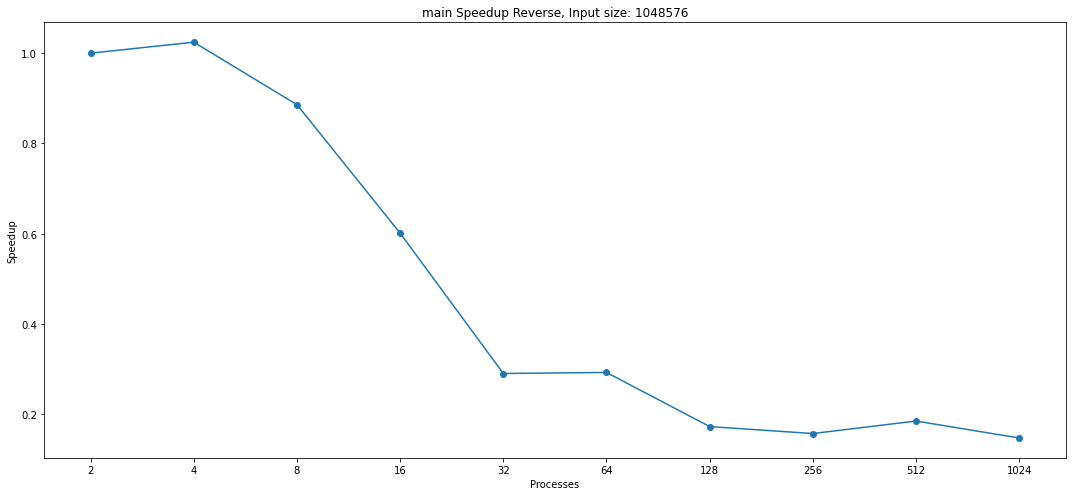

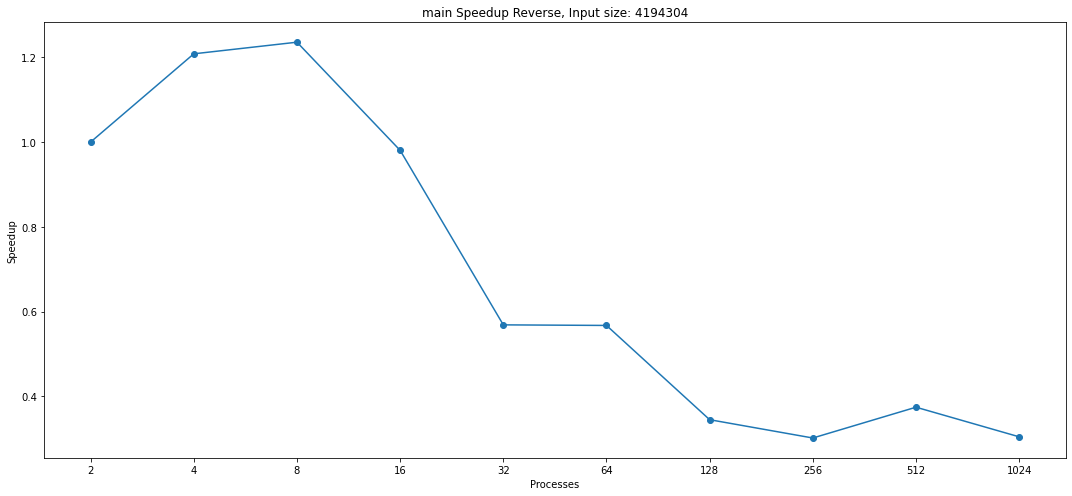

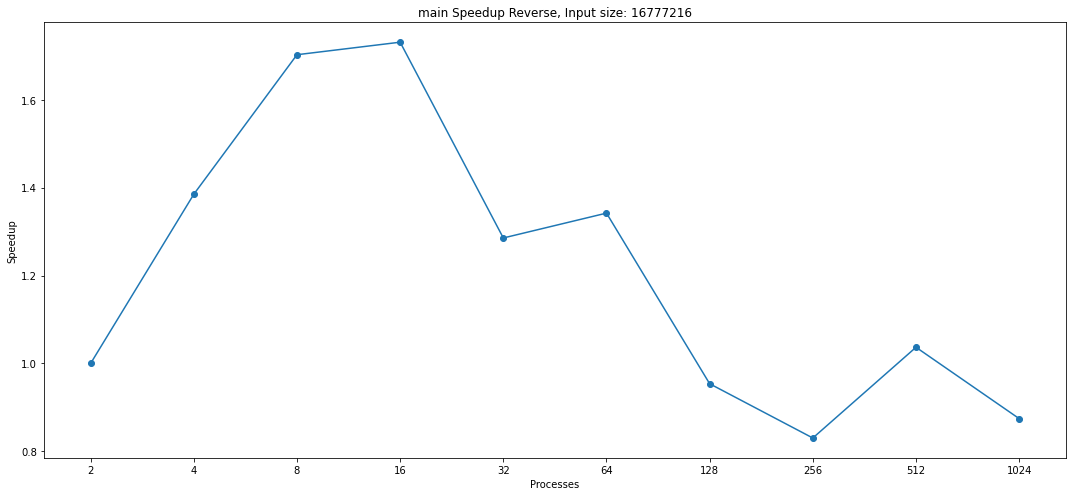

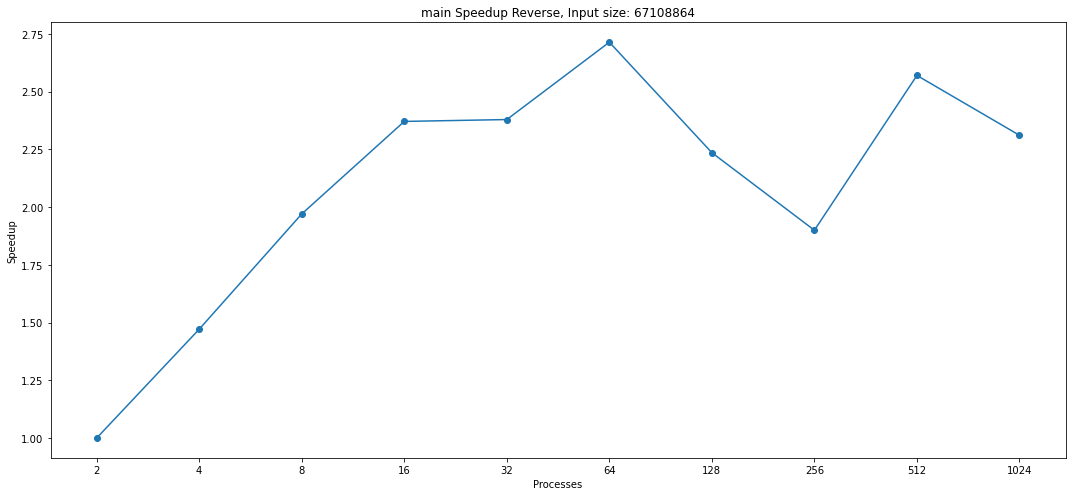

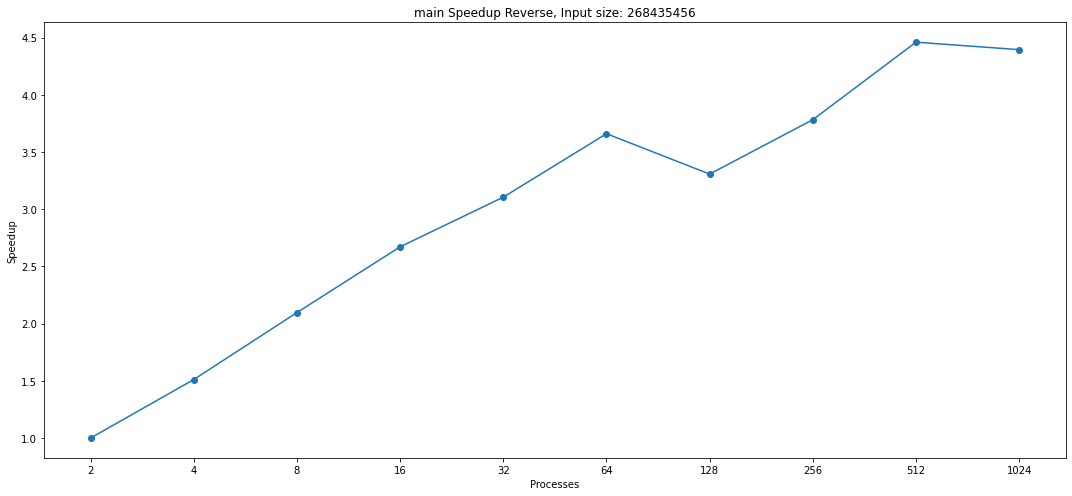

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.001966   0.006420   0.023586   0.091056   0.362090   1.440429   
4            0.002306   0.006518   0.024283   0.094038   0.376800   1.493288   
8            0.001853   0.006475   0.023700   0.095682   0.382259   1.524453   
16           0.002211   0.007003   0.024289   0.095711   0.386601   1.539944   
32           0.002212   0.007192   0.025150   0.096197   0.390962   1.554456   

input_size  268435456  
num_procs              
2            5.767603  
4            5.949475  
8            6.057640  
16           6.144298  
32           6.218886  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000013   0.000012   0.000015   0.000020   0.000026   0.000024   
4            0.000013   0.00001

In [54]:
leg = ["MIN", "AVG", "MAX"]

processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def plot_mplReverse(df, df2, df3, title, xlabel, ylabel):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.plot(processes, df2[input_size], marker='o')
        ax.plot(processes, df3[input_size], marker='o')

        ax.set_title(title + ", Reverse, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Reversed_{title}_{input_size}.png")
        plt.show()

for node in tkReverse.graph.traverse():
    plot_mplReverse(
        df=tkReverse.dataframe.loc[node, "Min time/rank"].unstack(level="input_size"),
        df2=tkReverse.dataframe.loc[node, "Avg time/rank"].unstack(level="input_size"),
        df3=tkReverse.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
    )
    
def plot_mplReverseOne(df, title, xlabel, ylabel, typ):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.set_title(title + " " + typ + ", Reverse, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Reversed_{title}_{typ}_{input_size}.png")
        plt.show()
    
    
for node in tkReverse.graph.traverse():
    plot_mplReverseOne(
        df=tkReverse.dataframe.loc[node, "Total time"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Total Time"
    )
    
for node in tkReverse.graph.traverse():
    plot_mplReverseOne(
        df=tkReverse.dataframe.loc[node, "Variance time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Variance"
    )
    
def plot_mplSortedReverse(df, title, xlabel, ylabel, typ):
    print(df.head())
    
    baseline = df.loc[2];
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, baseline[input_size] / df[input_size], marker='o')
        ax.set_title(title + " " + typ + " Reverse, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Reversed_{title}_{typ}_{input_size}.png")
        plt.show()
    
for node in tkReverse.graph.traverse():
    plot_mplSortedReverse(
        df=tkReverse.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Speedup",
        typ="Speedup"
    )

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.348901   0.409012   0.706275   2.302139  12.271508  27.177859   
4            0.387870   0.436636   0.623970   1.429907   4.298363  20.196993   
8            0.471551   0.501103   0.628067   1.163360   3.402484  12.489664   
16           0.759304   0.791158   0.880679   1.279669   2.724791   8.939925   
32           1.722642   1.591930   1.676043   1.874781   3.012142  10.106624   

input_size   268435456  
num_procs               
2           128.858280  
4            68.681587  
8            53.419807  
16           35.016175  
32           25.443378  


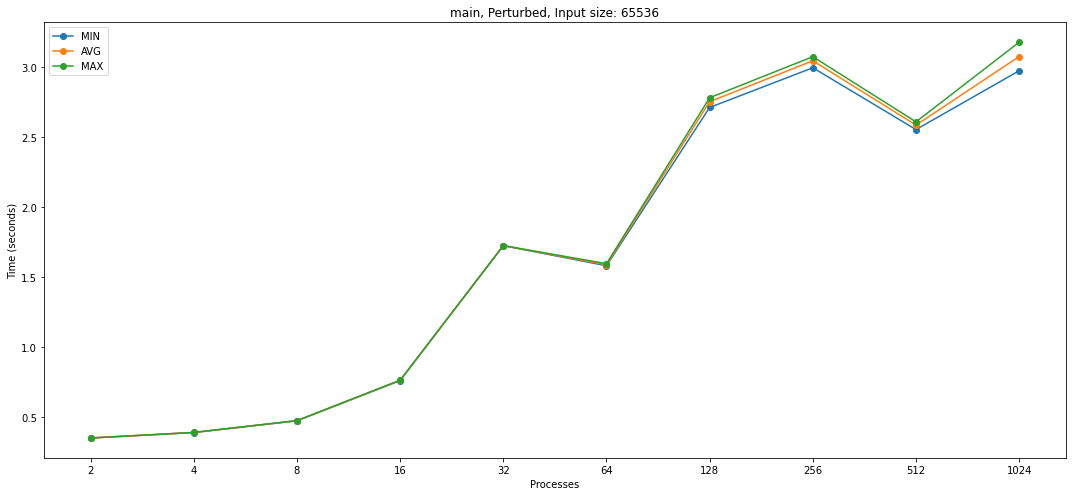

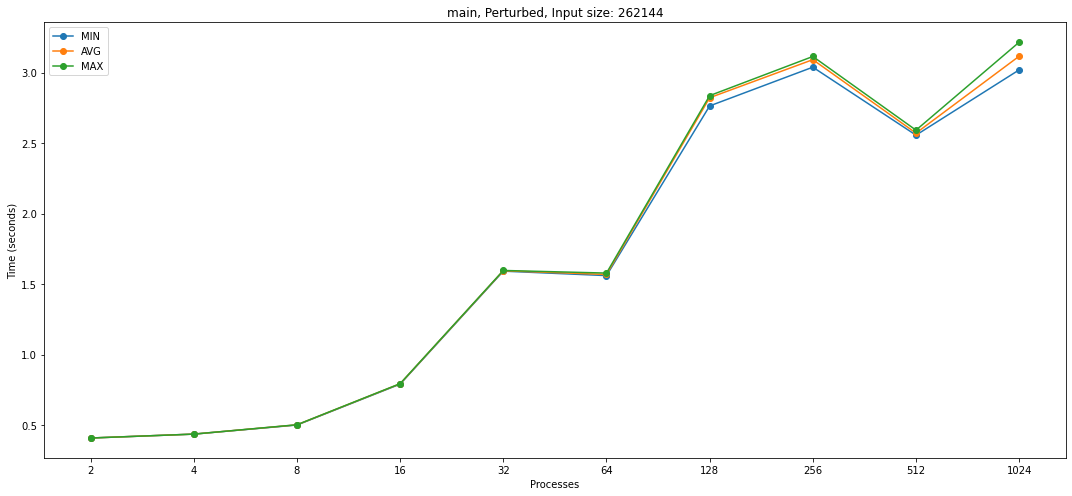

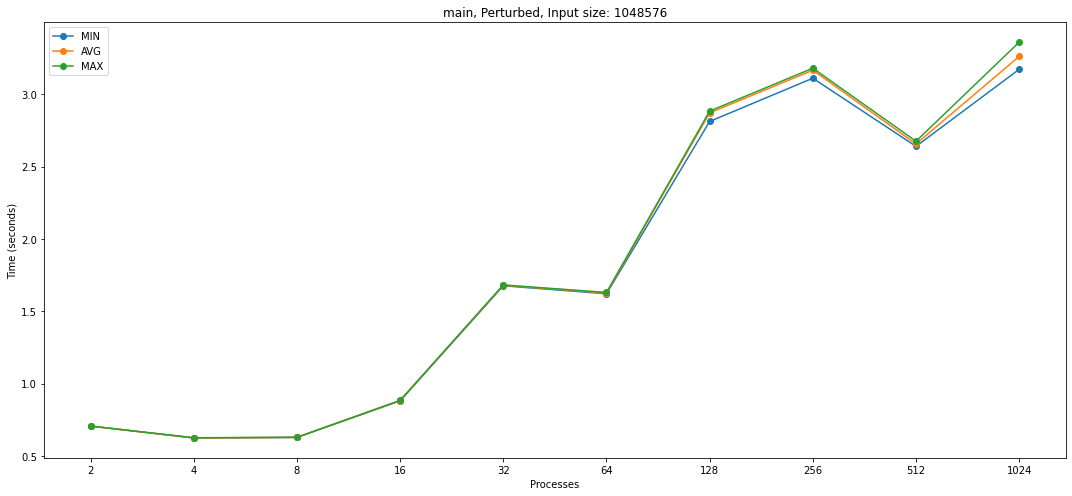

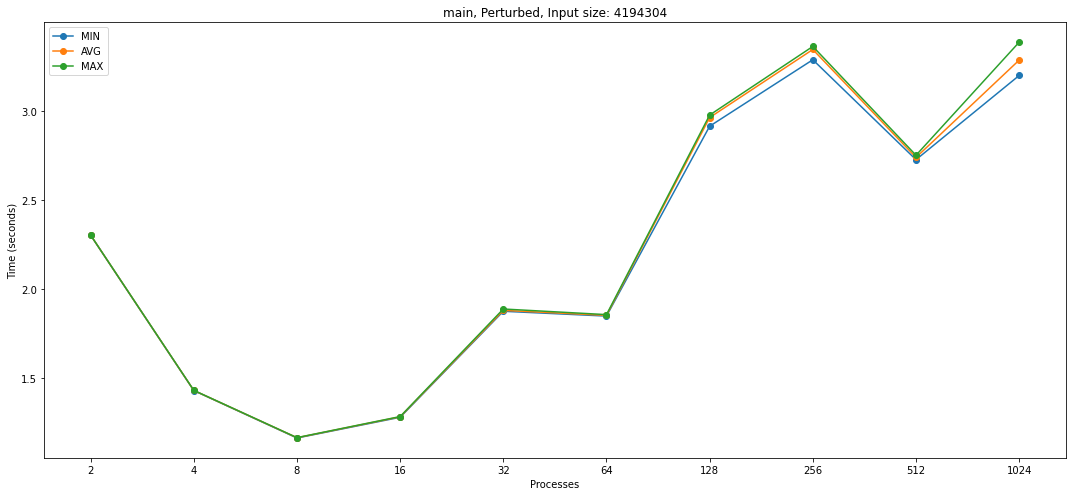

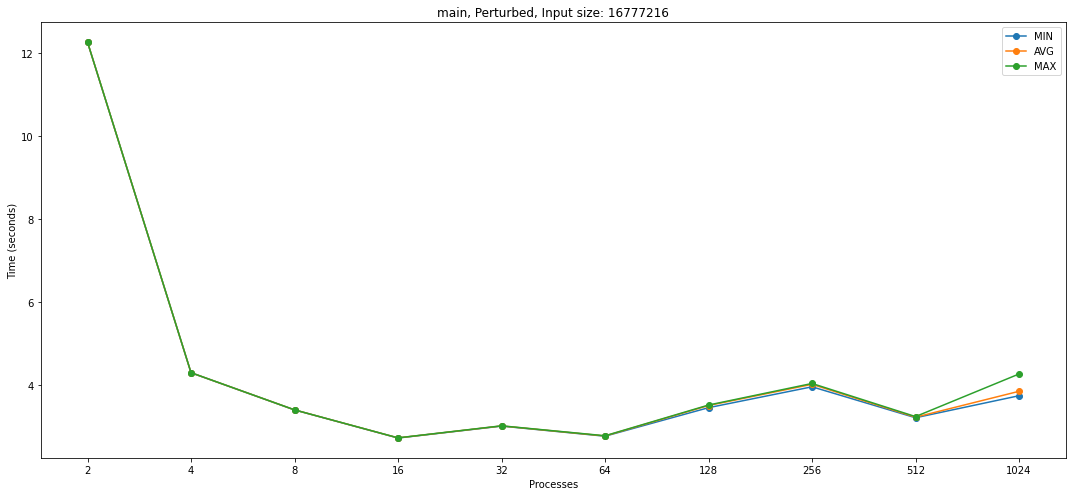

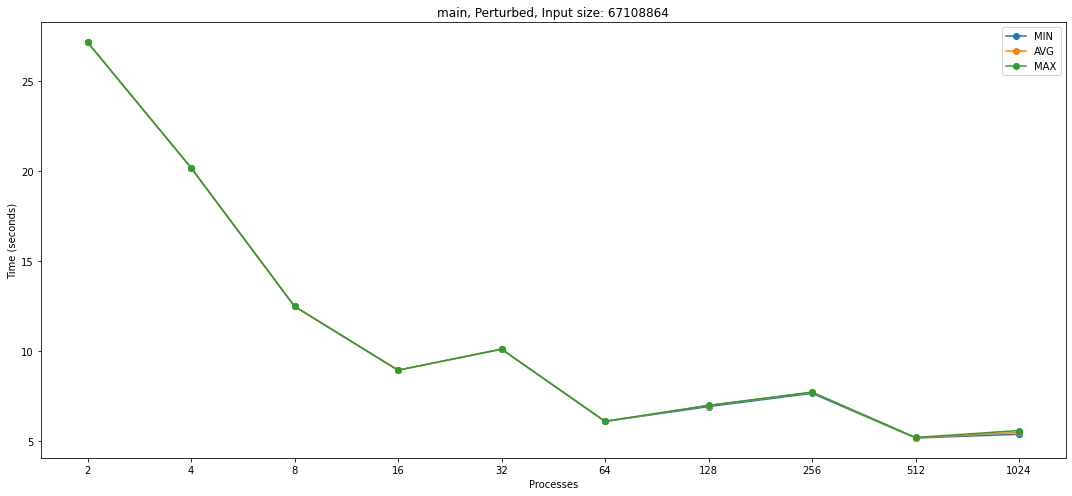

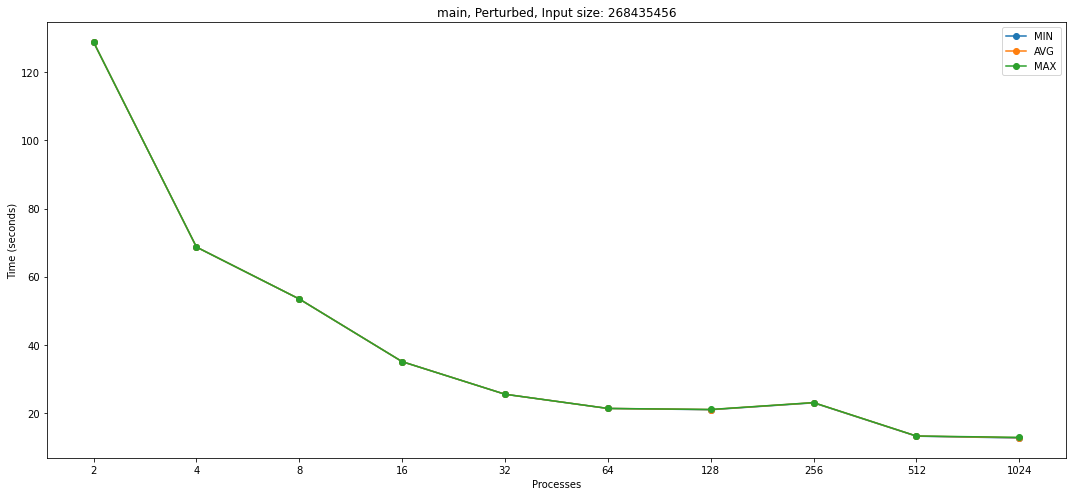

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.006534   0.000131   0.000147   0.000167   0.000144   0.000141   
4            0.000122   0.000128   0.000161   0.000170   0.000160   0.000158   
8            0.000123   0.000119   0.000134   0.000151   0.000170   0.000166   
16           0.000153   0.000178   0.000156   0.000164   0.000661   0.000207   
32           0.002615   0.000183   0.000617   0.000612   0.000663   0.000781   

input_size  268435456  
num_procs              
2            0.000151  
4            0.000581  
8            0.000186  
16           0.000218  
32           0.000683  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000004   0.000005   0.000006   0.000006   0.000009   0.000010   
4            0.000004   0.00000

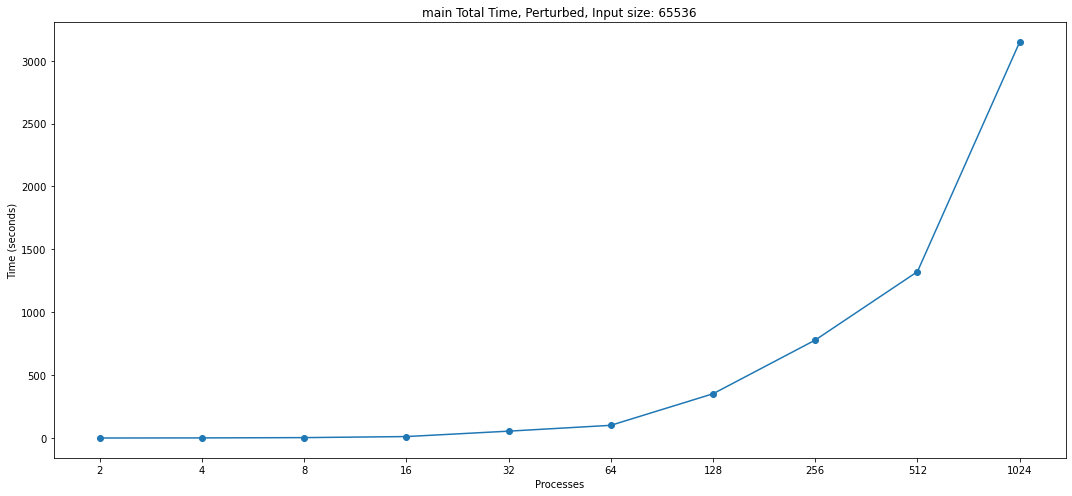

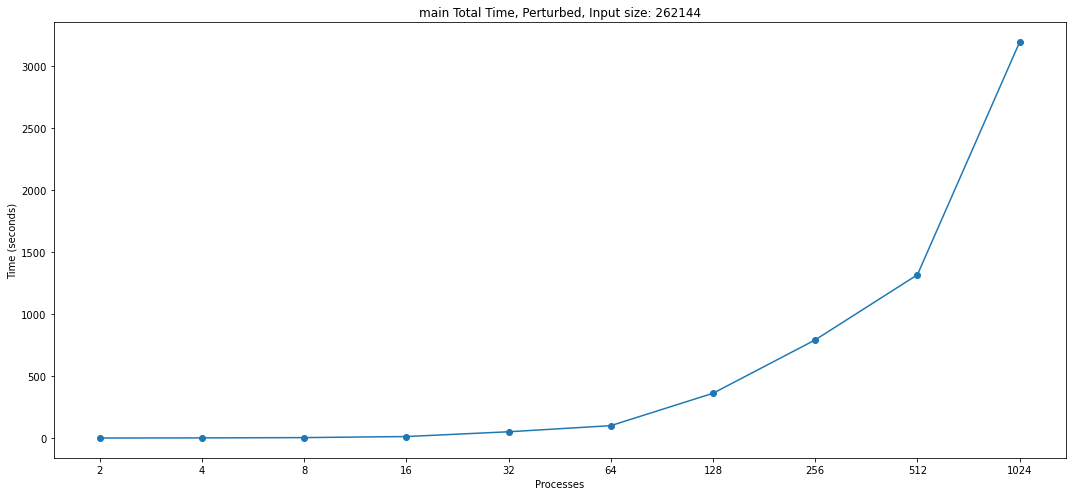

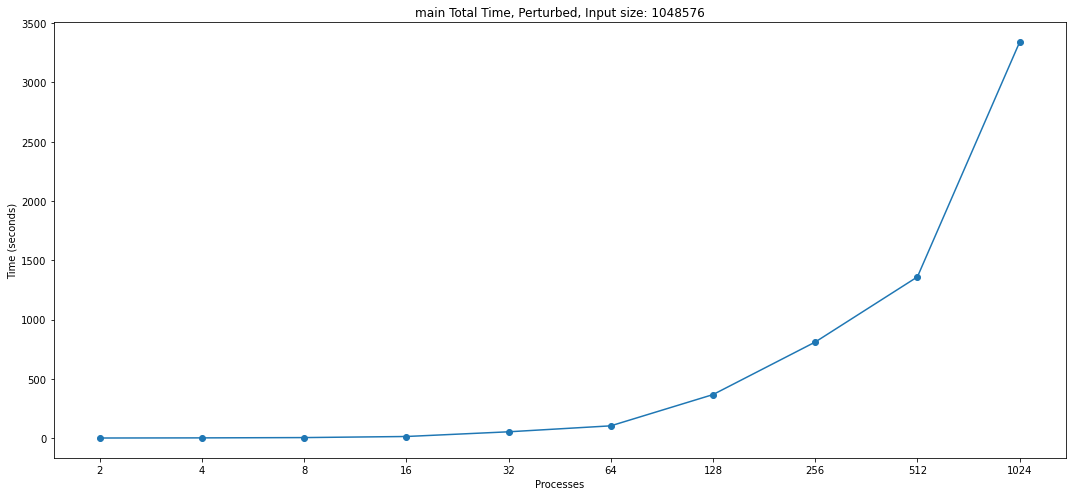

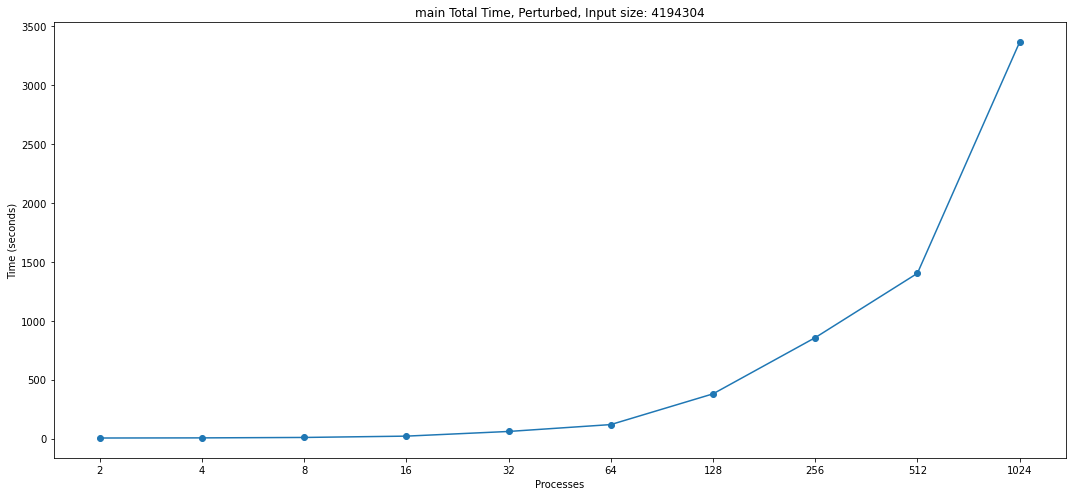

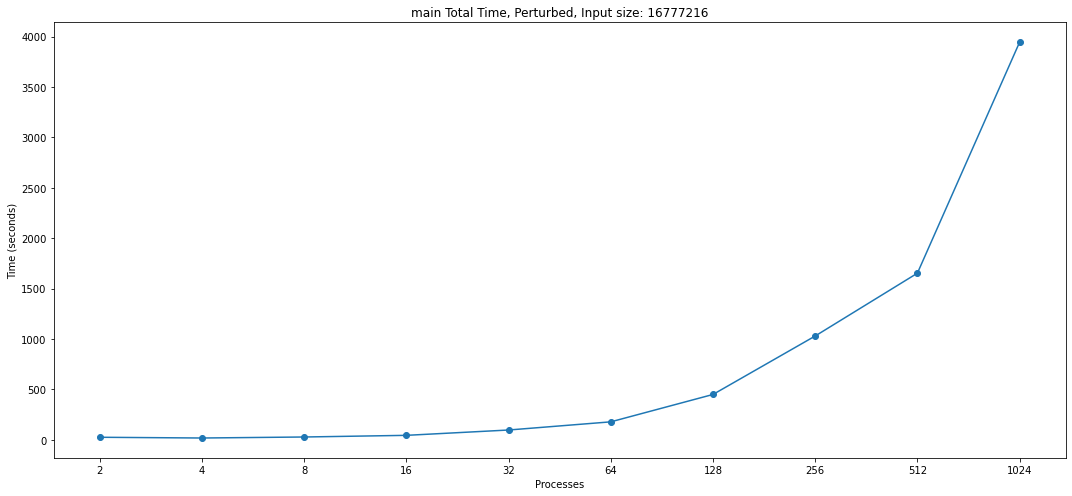

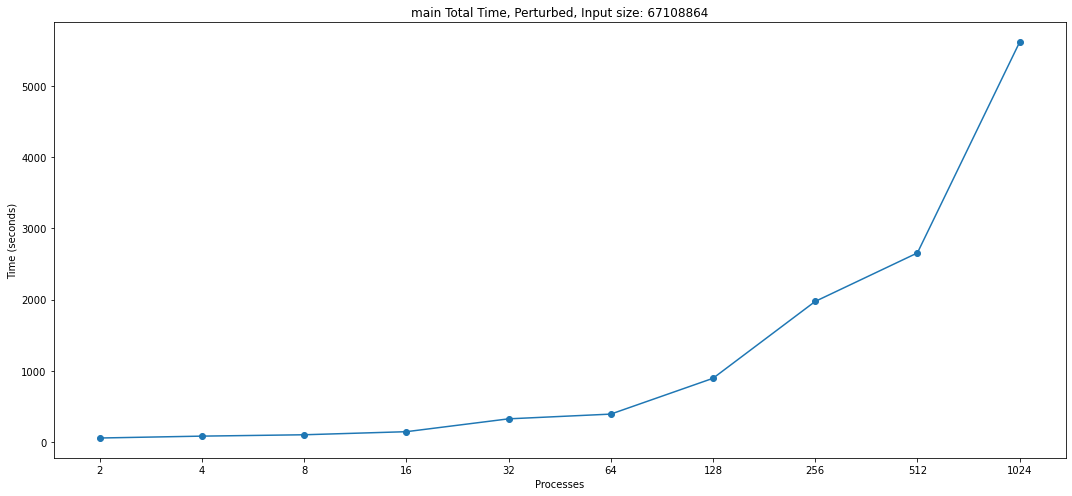

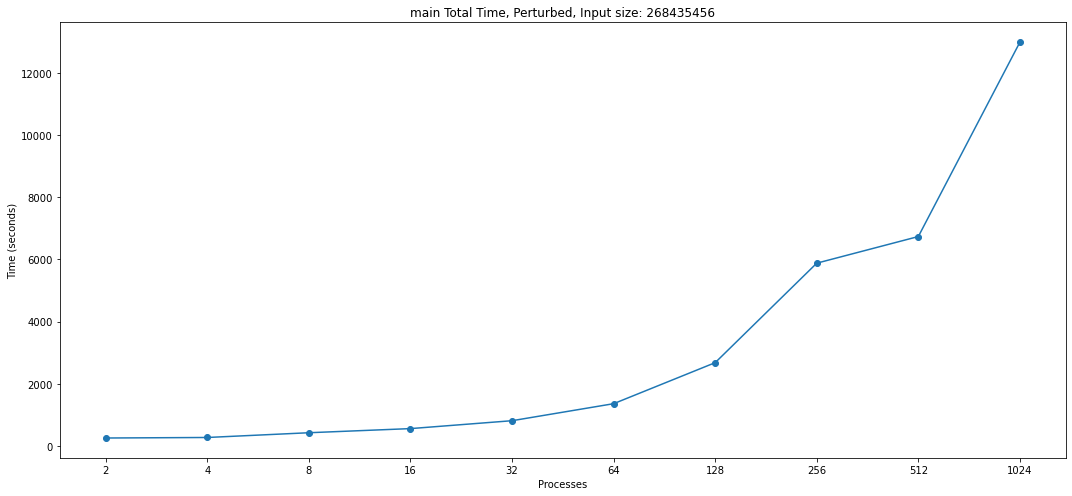

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.014936   0.006626   0.022971   0.092057   0.361693   1.449661   
4            0.006020   0.019387   0.072871   0.282127   1.123109   4.480216   
8            0.013004   0.044732   0.166065   0.668945   2.672573  10.674621   
16           0.027786   0.098189   0.363427   1.428964   5.816739  23.055465   
32           0.129721   0.193911   0.784980   2.992013  12.095950  55.997168   

input_size   268435456  
num_procs               
2             5.823251  
4            17.875577  
8            42.530394  
16           92.074626  
32          192.223698  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000017   0.000017   0.000021   0.000025   0.000033   0.000033   
4            0.000026   

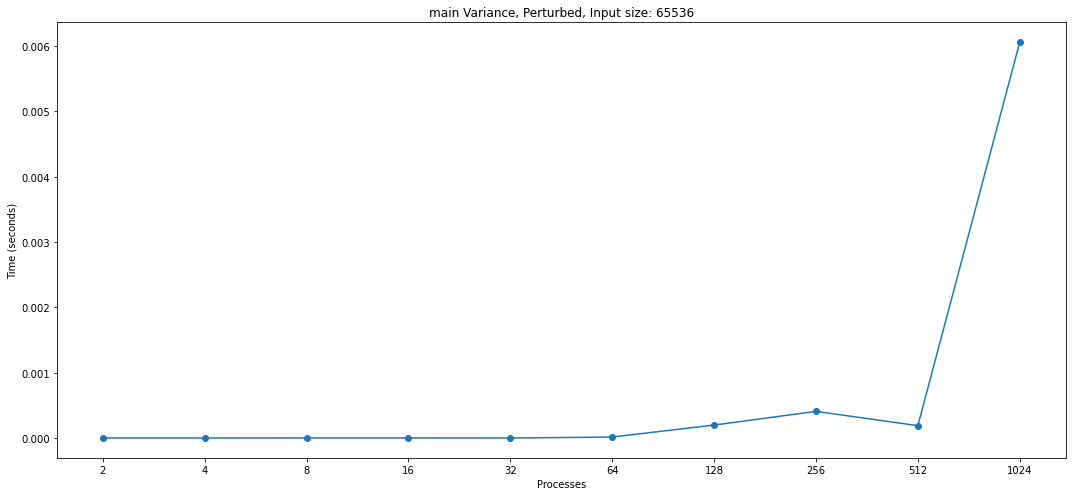

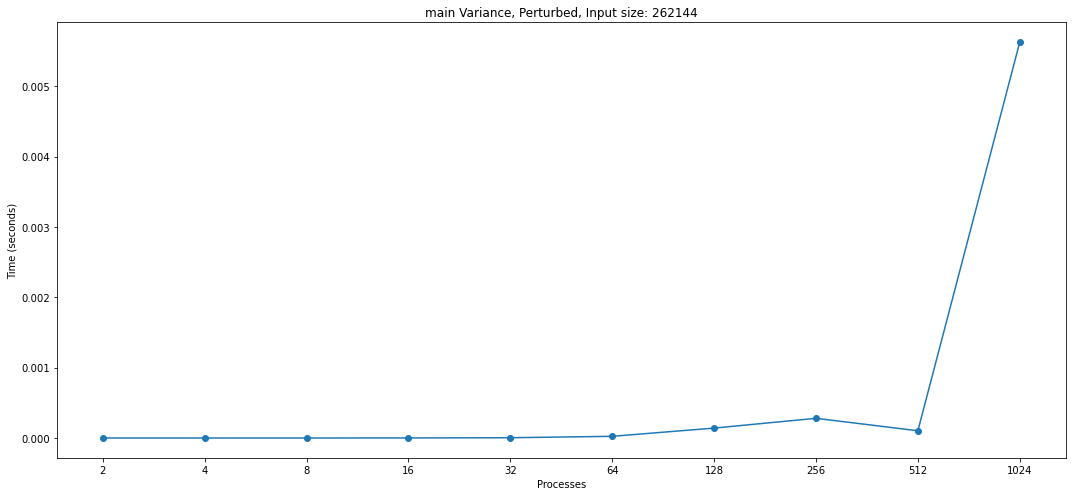

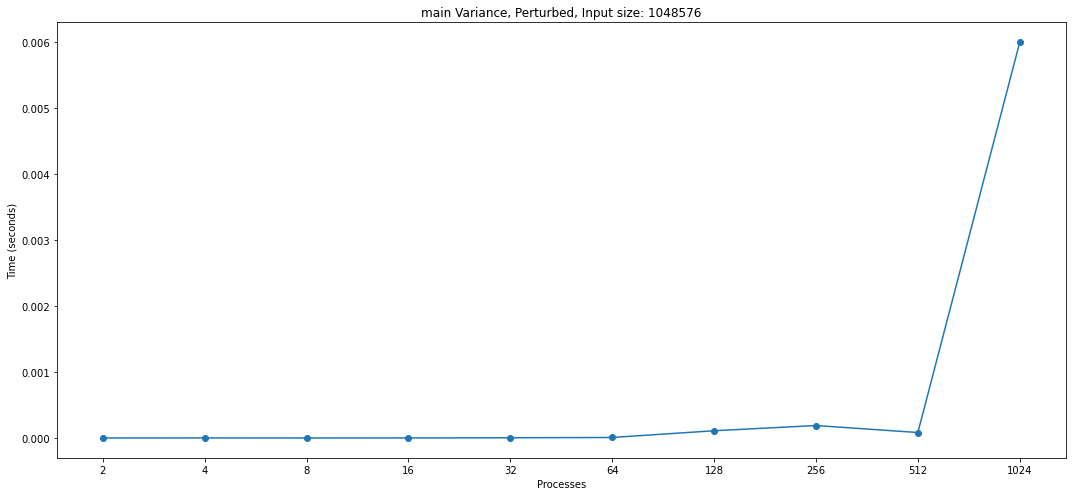

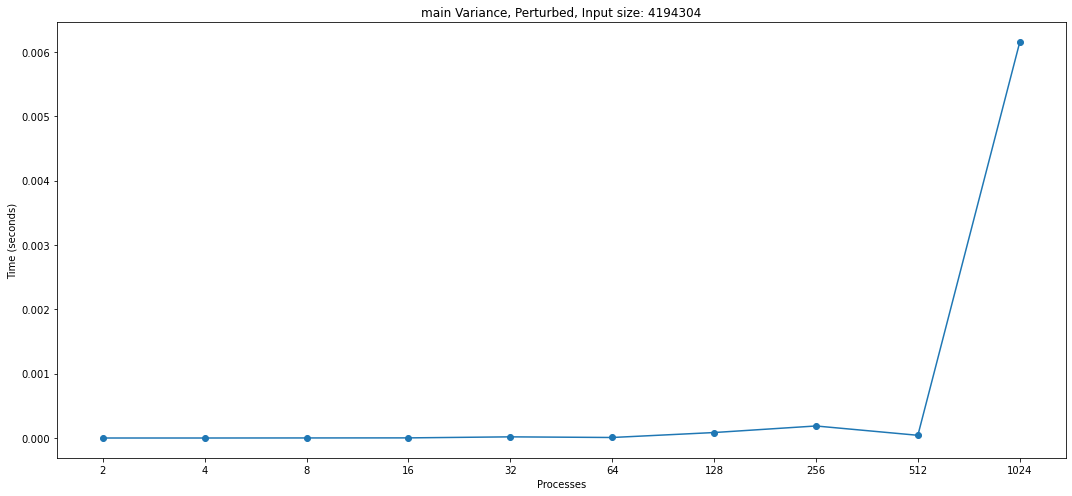

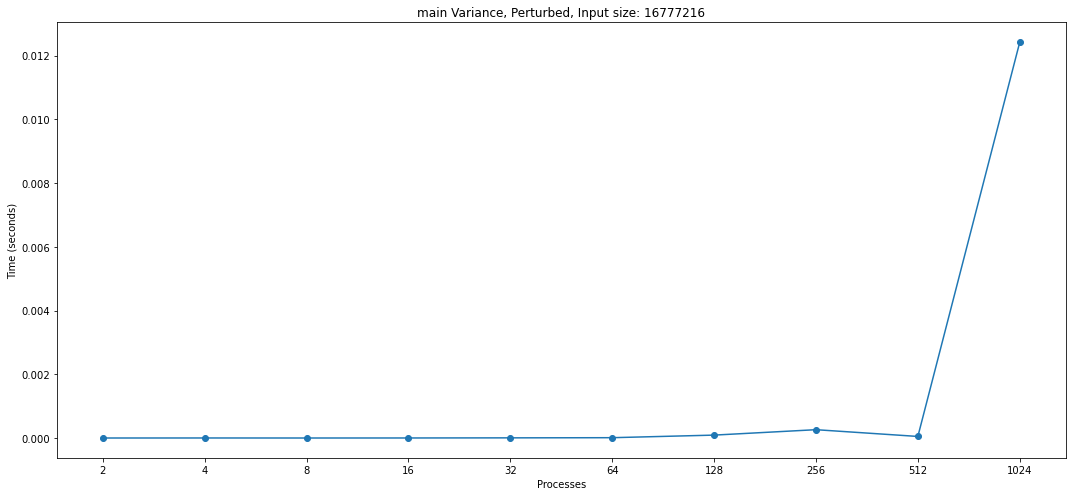

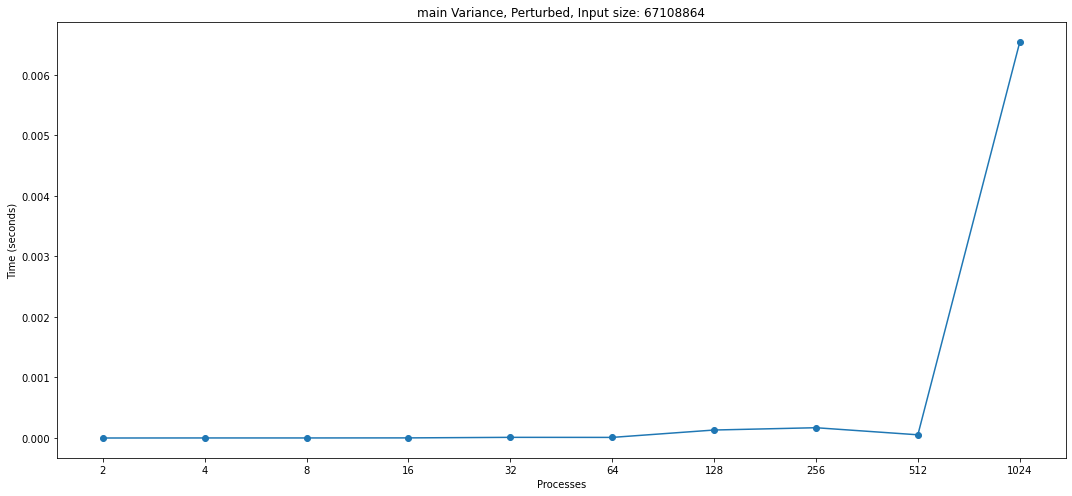

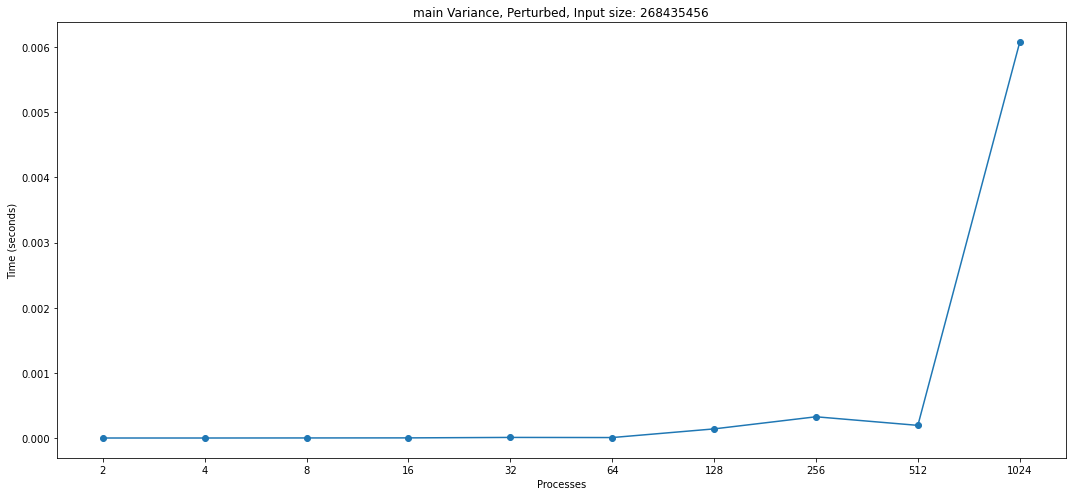

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000001   0.000010   0.000129   0.002103   0.032653   0.525175   
4            0.000001   0.000007   0.000109   0.001651   0.026260   0.418080   
8            0.000000   0.000004   0.000061   0.000995   0.015931   0.254289   
16           0.000000   0.000002   0.000034   0.000530   0.008781   0.138411   
32           0.000000   0.000001   0.000018   0.000278   0.004596   0.098708   

input_size  268435456  
num_procs              
2            8.476682  
4            6.655368  
8            4.037316  
16           2.207607  
32           1.163967  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2                 0.0        0.0        0.0        0.0        0.0        0.0   
4                 0.0        0.

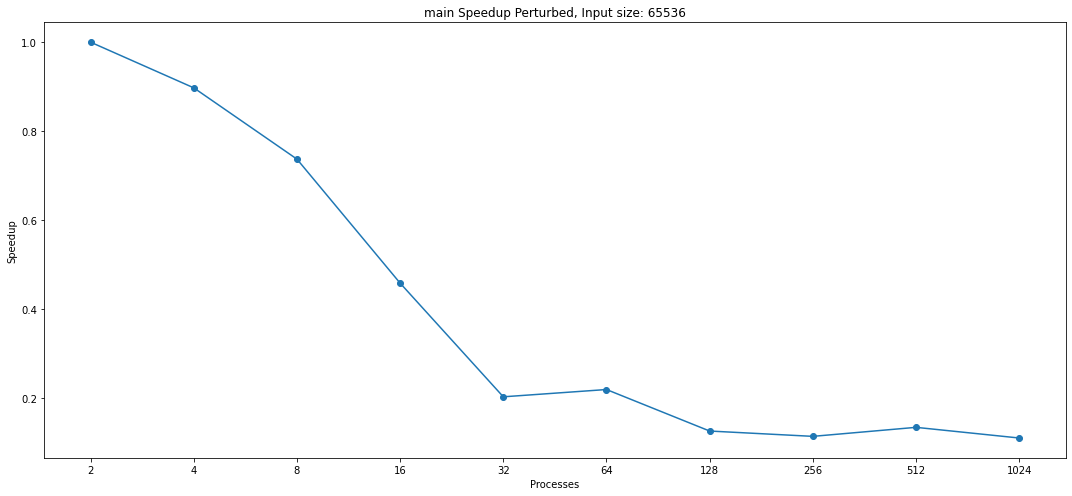

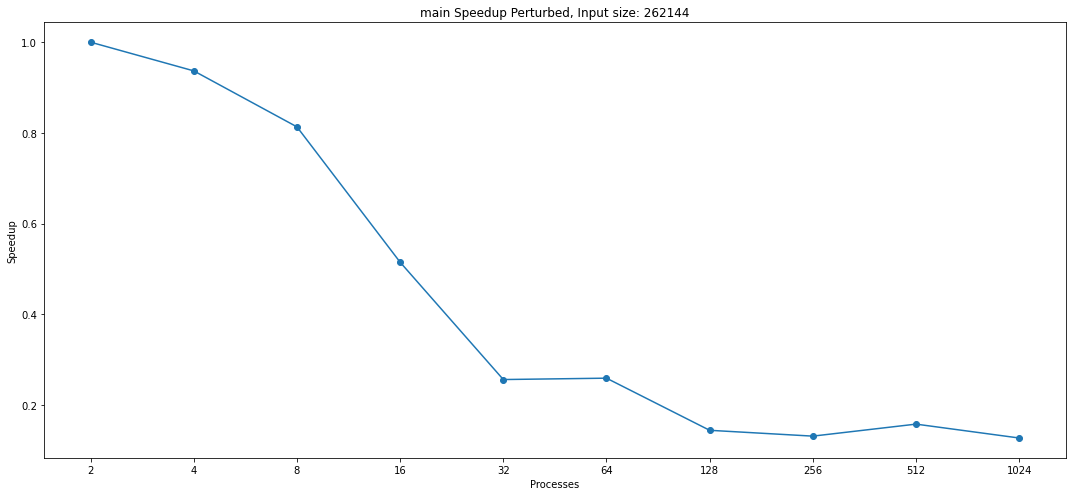

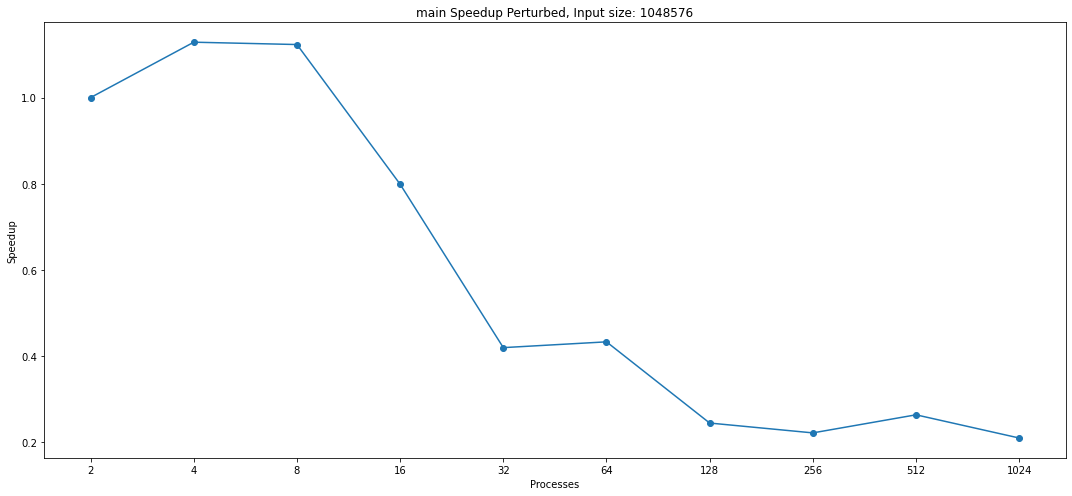

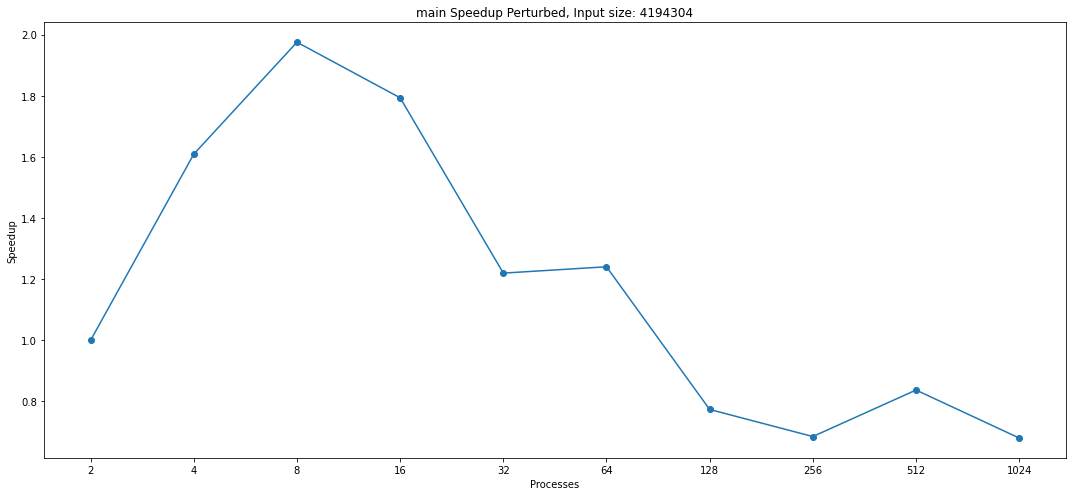

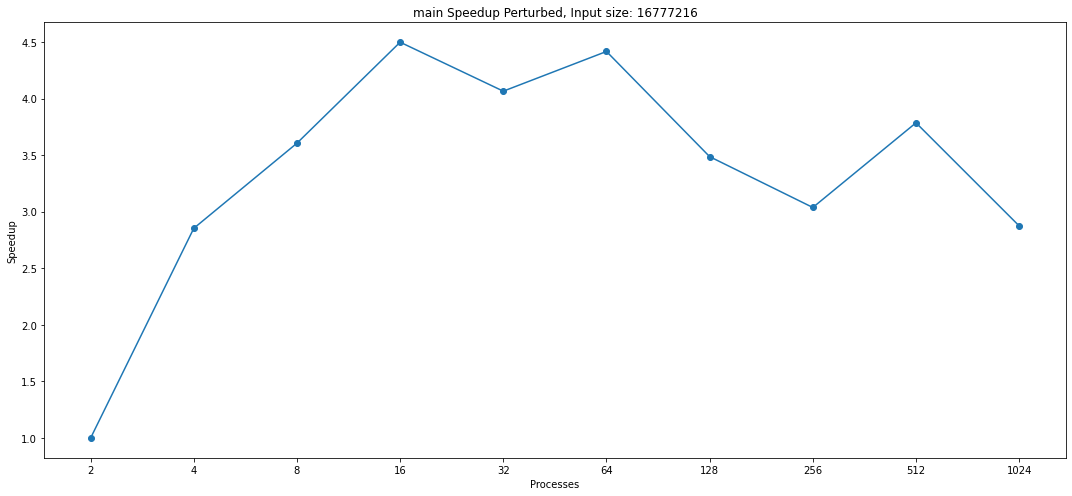

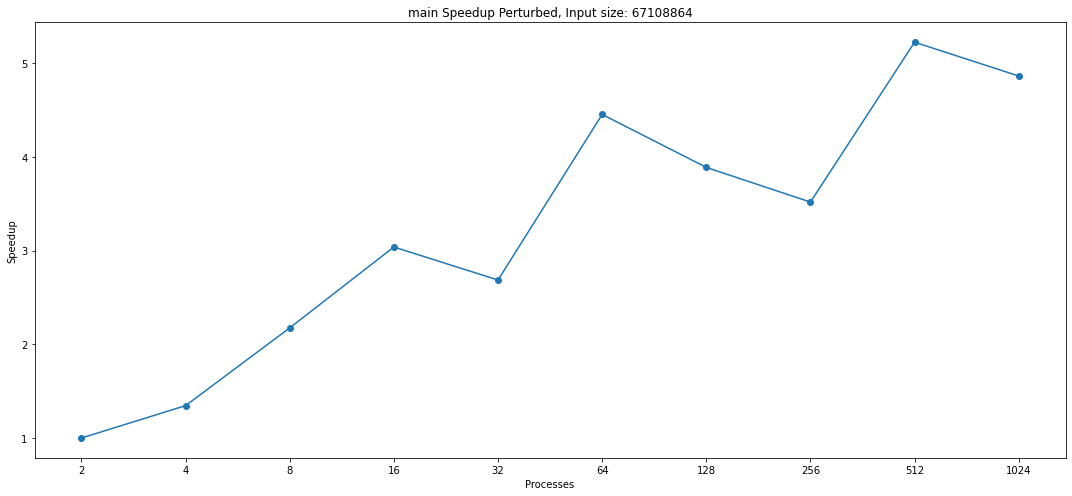

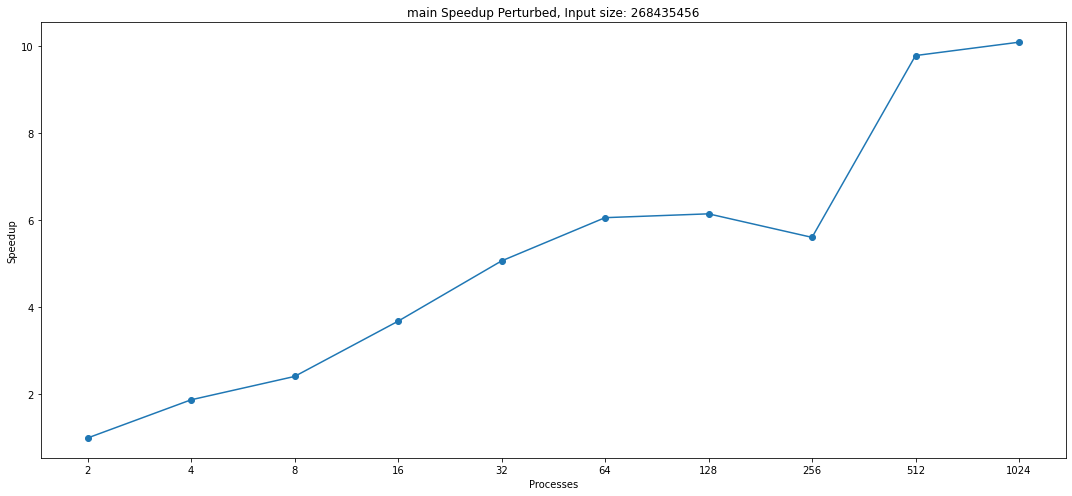

input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.008402   0.006495   0.022824   0.091890   0.361549   1.449520   
4            0.001969   0.006422   0.024547   0.094749   0.377261   1.501371   
8            0.001853   0.006384   0.023722   0.096098   0.384294   1.527905   
16           0.001884   0.006576   0.024265   0.095590   0.389351   1.542662   
32           0.004174   0.006321   0.025455   0.096664   0.392191   1.810536   

input_size  268435456  
num_procs              
2            5.823100  
4            5.974024  
8            6.083195  
16           6.153199  
32           6.217186  
input_size  65536      262144     1048576    4194304    16777216   67108864   \
num_procs                                                                      
2            0.000013   0.000012   0.000015   0.000019   0.000024   0.000022   
4            0.000013   0.00001

In [57]:
leg = ["MIN", "AVG", "MAX"]

processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def plot_mplPerturbed(df, df2, df3, title, xlabel, ylabel):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.plot(processes, df2[input_size], marker='o')
        ax.plot(processes, df3[input_size], marker='o')

        ax.set_title(title + ", Perturbed, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        ax.set_xticklabels(processes)
        plt.savefig(f"./results/graphs/Perturbed_{title}_{input_size}.png")
        plt.show()

for node in tkPerturbed.graph.traverse():
    plot_mplPerturbed(
        df=tkPerturbed.dataframe.loc[node, "Min time/rank"].unstack(level="input_size"),
        df2=tkPerturbed.dataframe.loc[node, "Avg time/rank"].unstack(level="input_size"),
        df3=tkPerturbed.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
    )
    
def plot_mplPerturbedOne(df, title, xlabel, ylabel, typ):
    print(df.head())  
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, df[input_size], marker='o')
        ax.set_title(title + " " + typ + ", Perturbed, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)
        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Perturbed_{title}_{typ}_{input_size}.png")
        plt.show()
    
    
for node in tkPerturbed.graph.traverse():
    plot_mplPerturbedOne(
        df=tkPerturbed.dataframe.loc[node, "Total time"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Total Time"
    )
    
for node in tkPerturbed.graph.traverse():
    plot_mplPerturbedOne(
        df=tkPerturbed.dataframe.loc[node, "Variance time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Time (seconds)",
        typ="Variance"
    )
    
def plot_mplSortedPerturbed(df, title, xlabel, ylabel, typ):
    print(df.head())
    
    baseline = df.loc[2];
    
    for input_size in df.columns:
        if title != "main":
            continue
        fig = plt.figure(figsize=(15,7))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(processes, baseline[input_size] / df[input_size], marker='o')
        ax.set_title(title + " " + typ + " Perturbed, Input size: " + str(input_size))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        #ax.legend(leg)
        plt.xscale("log", base=2)
        plt.xticks(processes)
        ax.set_xticklabels(processes)

        fig.patch.set_alpha(1.0)
        ax.patch.set_alpha(1.0)
        plt.savefig(f"./results/graphs/Perturbed_{title}_{typ}_{input_size}.png")
        plt.show()
    
for node in tkPerturbed.graph.traverse():
    plot_mplSortedPerturbed(
        df=tkPerturbed.dataframe.loc[node, "Max time/rank"].unstack(level="input_size"),
        title=node.frame["name"],
        xlabel="Processes",
        ylabel="Speedup",
        typ="Speedup"
    )